# **Import Libraries**
Langkah pertama yang kita lakukan adalah mengimpor library yang diperlukan.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# **Data Loading**
Data loading merupakan langkah awal pada project machine learning, di mana data dimuat untuk diproses lebih lanjut. Data yang digunakan dapat berasal dari berbagai sumber, yang kemudian diproses dengan menggunakan library panda.

Dataset yang digunakan pada project ini berasal dari file CSV yang diperoleh dari Kaggle. Dataset tersebut merupakan dataset penyakit kardiovaskular, yang terdiri dari 13 kolom dan 70.000 baris.

In [6]:
data = pd.read_csv('data/data.csv')

# **Data Cleaning and Transformation**
Data mentah sering kali tidak sempurna. Ada kemungkinan data mengandung nilai yang hilang, tidak konsisten, atau bahkan tidak relevan. Langkah ini penting untuk memastikan data kita bersih, konsisten, dan siap untuk dianalisis.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Berdasarkan informasi di atas, diketahui bahwa tidak ada data yang null. 

In [8]:
data.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### **Membuang Feature yang Tidak Penting**

In [9]:
data.drop(columns=['id'], inplace=True)

### Summary Membuang Feature yang Tidak Penting
kolom Id dibuang karena tidak berkontribusi secara signifikan terhadap hasil prediksi dan hanya akan menambah noise sehigga model sulit belajar. Sehingga fitur Id ini dihapus agar model menjadi lebih sederhana, lebih cepat dilatih, dan mampu menghasilkan prediksi yang lebih akurat. 

### **Pengecekan Data yang Hilang**

In [10]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Summary Pengecekan Data yang Hilang
Pengecekan data yang hilang (missing value) merupakan salah satu proses yang dilakukan untuk memastikan integritas data. Data yang hilang dapat menyebabkan bias dalam analisis dan pelatihan model. Jika ada data hilang yang teridentifikasi, maka diperlukan penanganan terhadap data hilang tersebut, seperti menghapus baris atau kolom terkait, atau mengganti data tersebut dengan nilai rata-rata (mean), median, atau modus. Penanganan yang tepat sangat berpengaruh pada tingkat akurasi analisis dan dapat mengurangi risiko distorsi dalam model.

Proses pengecekan ini dilakukan dengan menggunakan metode isnull(). Berdasarkan output yang diberikan, dapat disimpulkan bahwa data sudah cukup baik karena tidak memiliki nilai yang hilang. Oleh karena itu, tidak ada penanganan yang dilakukan, sehingga dapat langsung dilanjutkan ke tahap selanjutnya.

### **Mengatasi Outliers**
Tidak selamanya outliers itu buruk, khususnya pada data yang mengusung topik tentang penyakit kardiovaskular. Bisa saja outliers tersebut berguna pada dunia nyata. Kami akan menghapus data outliers yang tidak masuk akal dan tidak mungkin terjadi di dunia nyata contohnya tekanan darah manusia yang mencapai 2000 mmHg.

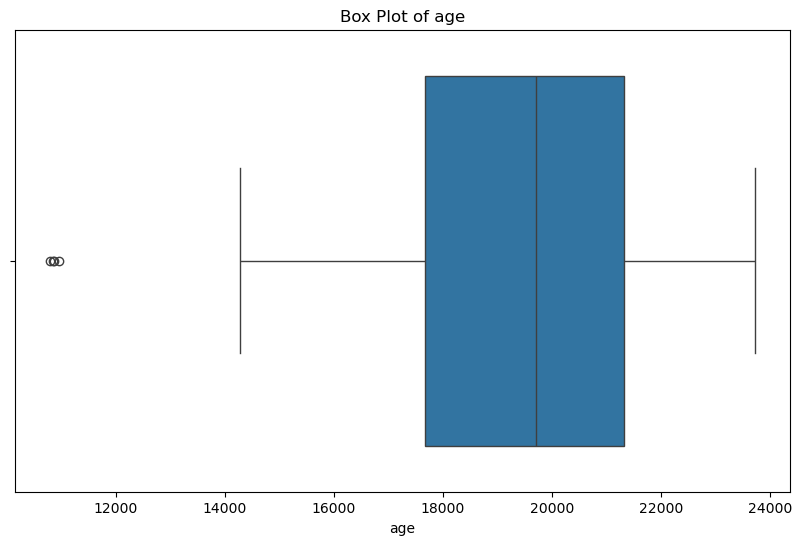

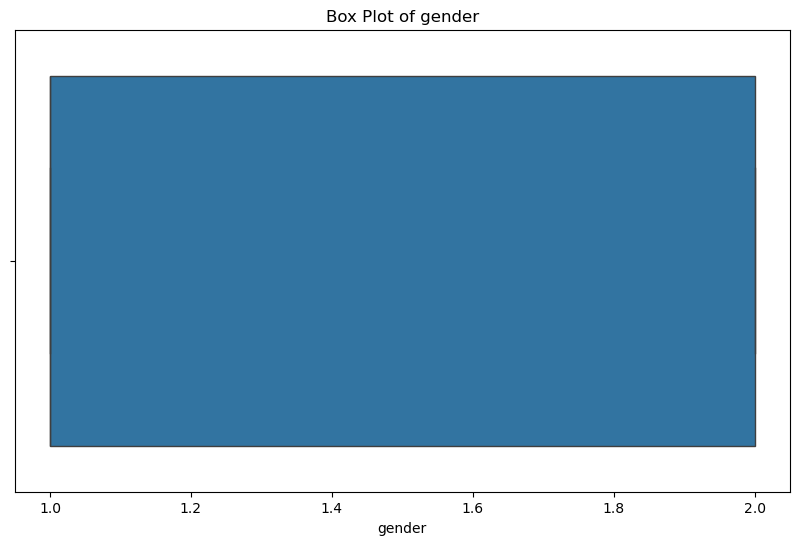

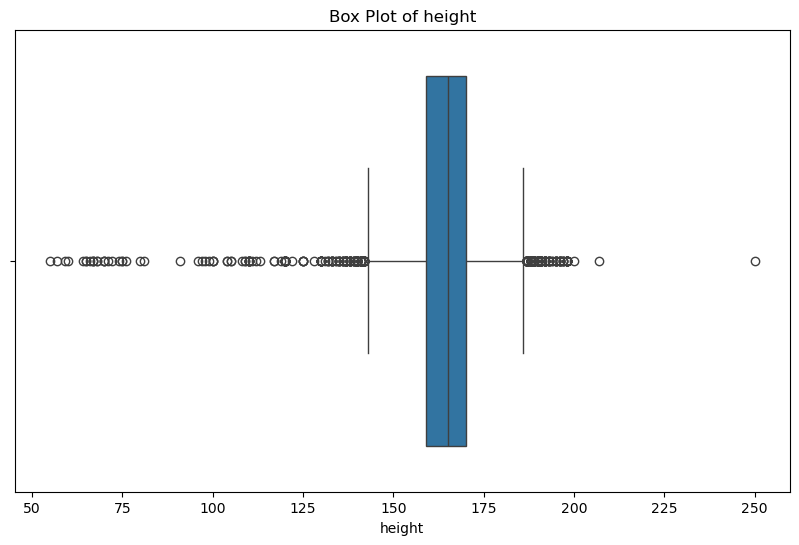

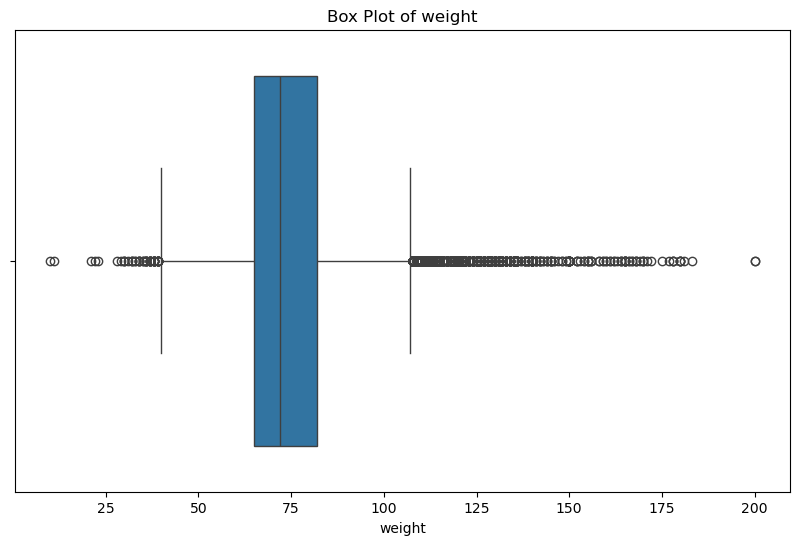

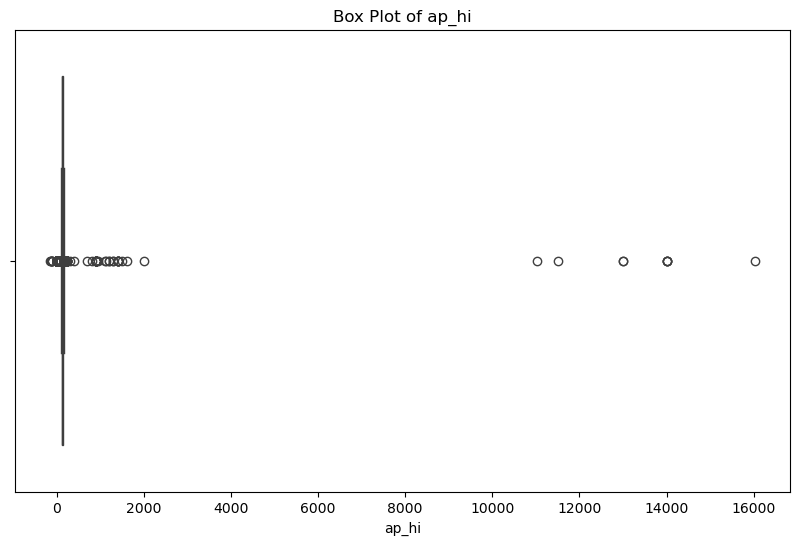

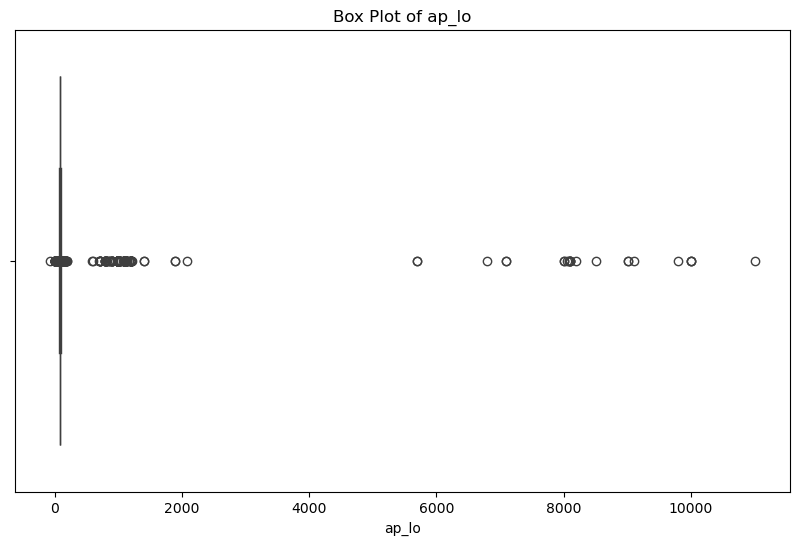

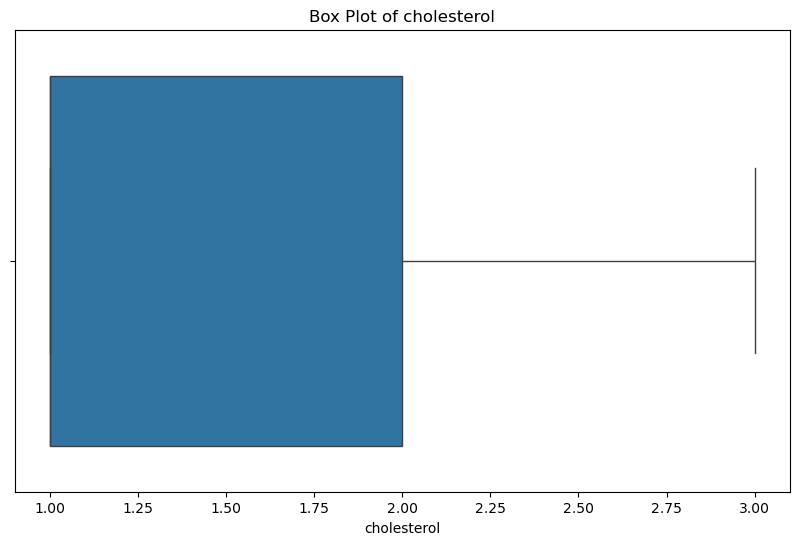

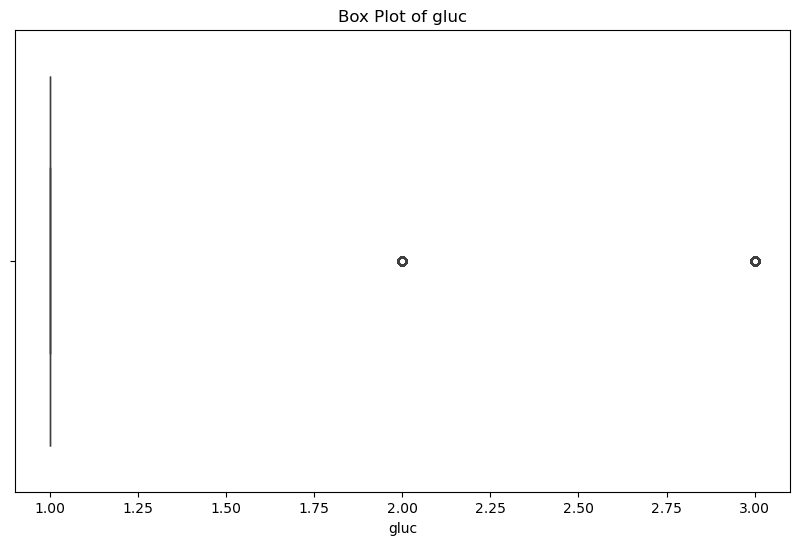

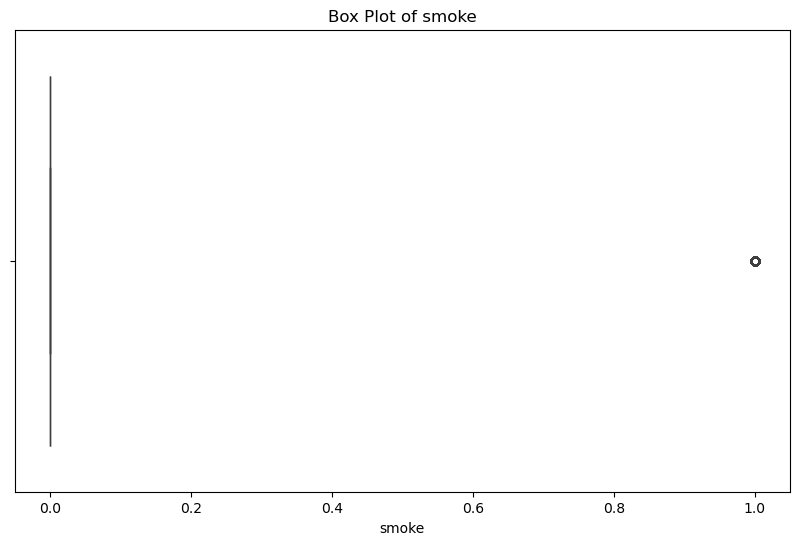

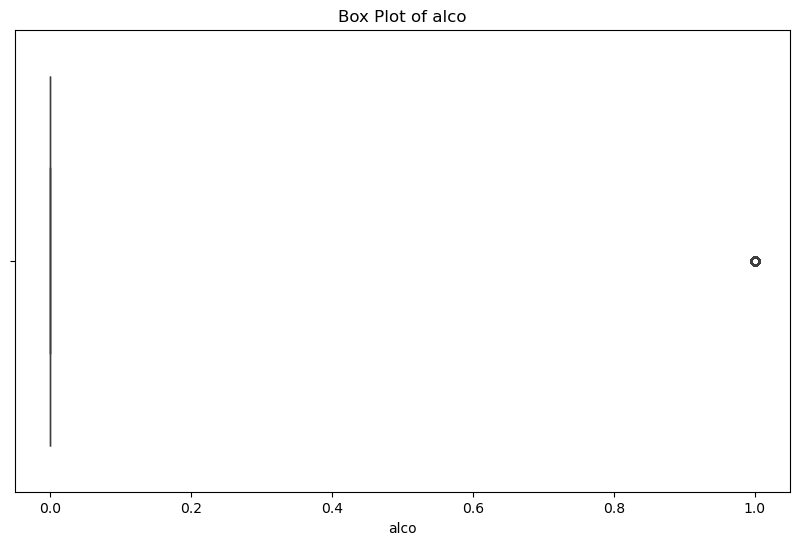

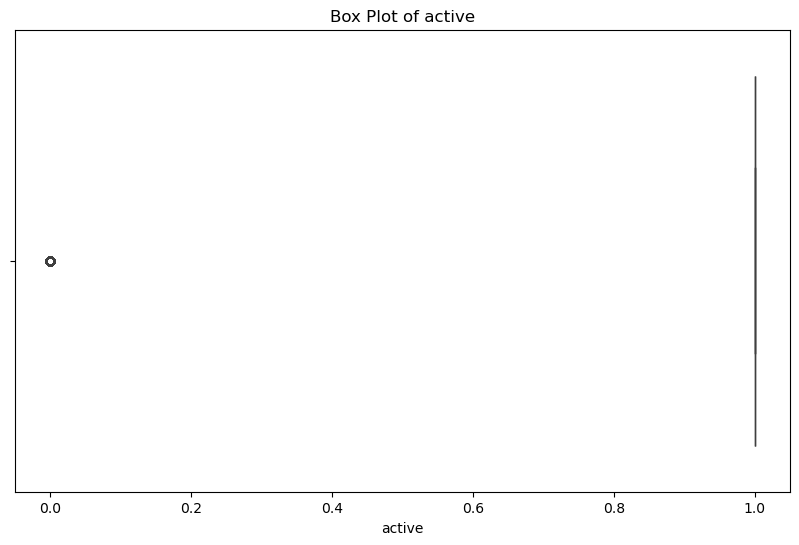

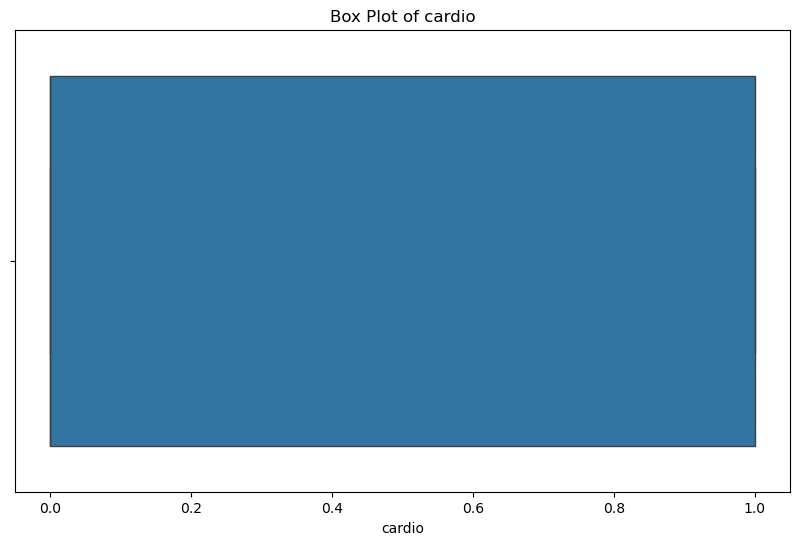

In [11]:
for feature in data:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=data[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

#### Mengubah Age dari Days menjadi Years

#### **Age Feature**

In [12]:
print(data['age'])

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64


In [13]:
data['age'] = data['age'] / 365
print("Age setelah diubah menjadi Years:")
print(data['age'])

Age setelah diubah menjadi Years:
0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64


#### Summary Mengubah Age dari Days Menjadi Years:
Pada tahap ini, data 'age' yang awalnya dalam format *days* diubah menjadi format *years*. Perubahan format ini dilakukan agar data dapat lebih mudah dipahami dan lebih sesuai dengan standar umum pada berbagai aspek, seperti studi medis, sosial, demografi, dan lain-lain. Selain itu, konversi data ini akan memperkecil skala angka, sehingga analisis dapat menjadi lebih efisien.

Konversi data ini juga mengubah tipe datanya dari *int* menjadi *float* karena hasil pembagiannya yang tidak selalu menghasilkan angka bulat. Data 'age' dalam format *years* ini menggunakan tipe data float untuk mempertahankan akurasi agar dapat memberikan hasil analisis yang lebih presisi.

#### **Gender Feature**

In [14]:
gender_value_counts = data['gender'].value_counts()
max_index = gender_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in gender_value_counts.index]

print(gender_value_counts)

gender
1    45530
2    24470
Name: count, dtype: int64


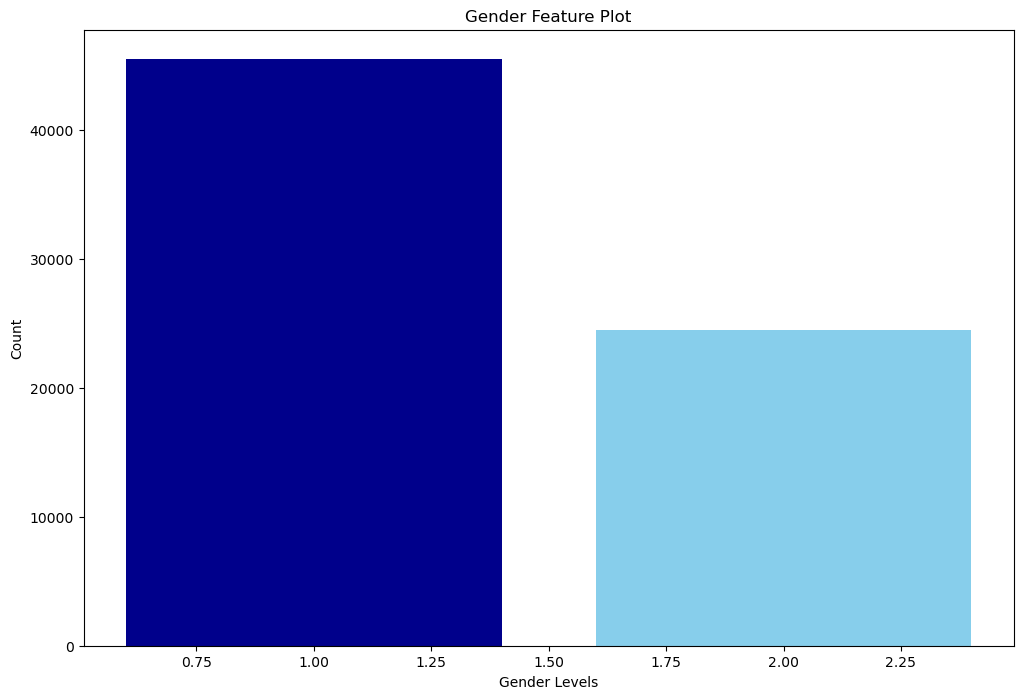

In [15]:
plt.figure(figsize=(12, 8))
plt.bar(gender_value_counts.index, gender_value_counts.values, color=colors)
plt.xlabel('Gender Levels')
plt.ylabel('Count')
plt.title('Gender Feature Plot')
plt.show()

In [16]:
# mengecek apakah ada data yang outlier (bukan 1, 2)
invalid_gender= data[~data['gender'].isin([1, 2])]

print(f"Jumlah data dengan nilai gender tidak valid: {len(invalid_gender)}")

Jumlah data dengan nilai gender tidak valid: 0


Ada sebanyak 45,530 individu dengan gender perempuan dan ada 24,470 individu dengan gender laki-laki. Hal ini memberikan informasi tentang ketidakseimbangan yang signifikan, dimana lebih banyak yang perempuan daripada yang laki-laki. 

#### **Height Feature**

In [17]:
height_value_counts = data['height'].value_counts().sort_index()
max_index = height_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in height_value_counts.index]

print(height_value_counts)

height
55      1
57      1
59      1
60      1
64      1
       ..
197     4
198    14
200     1
207     1
250     1
Name: count, Length: 109, dtype: int64


Ada beberapa hal yang tidak memungkinkan terjadi pada data ini. Pertama, dari sebaran data dapat dilihat bahwa data umur minimum yang ada pada data tersebut yaitu berumur 29,5 tahun dan maksimal berumur 64,9 atau bisa dibulatkan menjadi umur 65 tahun. Menurut kami, tidak memungkinkan apabila dalam rentang umur tersebut terdapat orang yang memiliki tinggi dibawah 120 cm. Jadi kami akan menghitung banyaknya orang yang tinggi nya dibawah 120 cm dan data tersebut akan dihapus.

In [18]:
height_under_120 = (data['height'] < 120).sum()

print(f'Data Height Under 120 cm: {height_under_120}')

Data Height Under 120 cm: 52


In [19]:
data = data[(data['height'] >= 120)]

In [20]:
data['height'] = data['height'] / 100
data['height'].describe()

count    69948.000000
mean         1.644153
std          0.079325
min          1.200000
25%          1.590000
50%          1.650000
75%          1.700000
max          2.500000
Name: height, dtype: float64

Data dalam meter memiliki nilai yang lebih kecil, sehingga lebih mudah diolah dan dibaca dibandingkan menggunakan angka besar dalam centimeter. Distribusi ini juga menunjukkan bahwa sebagian besar individu memiliki tinggi badan normal antara 1.59 m hingga 1.7 m, sesuai dengan 25th hingga 75th percentile.

#### **Weight Feature**

In [21]:
print(data['weight'])

0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 69948, dtype: float64


In [22]:
data['weight'].describe()

count    69948.000000
mean        74.198944
std         14.368201
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [23]:
data_sorted_weight = data.sort_values(by="weight")


In [24]:
outliers = data[(data['weight'] < 30) | (data['weight'] > 160)]
print(outliers)


             age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
389    45.802740       2    1.65   169.0    120     80            1     1   
435    45.931507       1    1.86   200.0    130     70            1     1   
2441   52.523288       2    1.77   177.0    130     90            1     1   
2458   64.783562       2    1.59   165.0    130     70            1     1   
4743   47.172603       2    1.76   180.0    140     90            1     1   
6003   39.564384       1    1.72   166.0    140     90            1     1   
6153   57.506849       1    1.22   161.0    120     80            1     1   
8423   40.265753       1    1.70   165.0    120     80            1     1   
12435  60.484932       1    1.37   161.0    150    100            2     1   
14520  60.358904       1    1.70   165.0    120     80            1     1   
15366  47.684932       1    1.25   167.0    180     90            1     2   
18031  41.331507       2    1.90   165.0    160     60            1     1   

In [25]:
data = data[(data['weight'] >= 30) & (data['weight'] <= 160)]

 Kami menganggap berat badan yang lebih ringan dari 30kg dan lebih berat dari 160kg adalah outlier karena 30kg terlalu kecil untuk manusia dewasa, mengingat usia minimum adalah 25 tahun dan berat badan lebih dari 160kg juga dianggap outlier karena berada di kategori obesitas ekstrem yang sangat jarang terjadi pada populasi umum. Jika ada individu dengan berat seperti ini, jumlahnya sangat sedikit, sehingga dianggap sebagai outlier statistik.

#### **Tekanan Darah Sistolik (ap_hi)**

In [26]:
ap_hi_counts = data['ap_hi'].value_counts()

print(ap_hi_counts)

ap_hi
 120     27667
 140      9493
 130      8950
 110      8631
 150      4443
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: count, Length: 153, dtype: int64


In [27]:
ap_hi_counts_negative = (data['ap_hi'] <= 0).sum()
ap_hi_counts_1_to_200 = ((data['ap_hi'] > 0) & (data['ap_hi'] <= 200)).sum()
ap_hi_counts_more_than_200 = (data['ap_hi'] > 200).sum()

print(f'ap_hi Negative Value: {ap_hi_counts_negative}')
print(f'ap_hi 1 to 200 Value: {ap_hi_counts_1_to_200}')
print(f'ap_hi More Than 200 Value: {ap_hi_counts_more_than_200}')

ap_hi Negative Value: 7
ap_hi 1 to 200 Value: 69799
ap_hi More Than 200 Value: 100


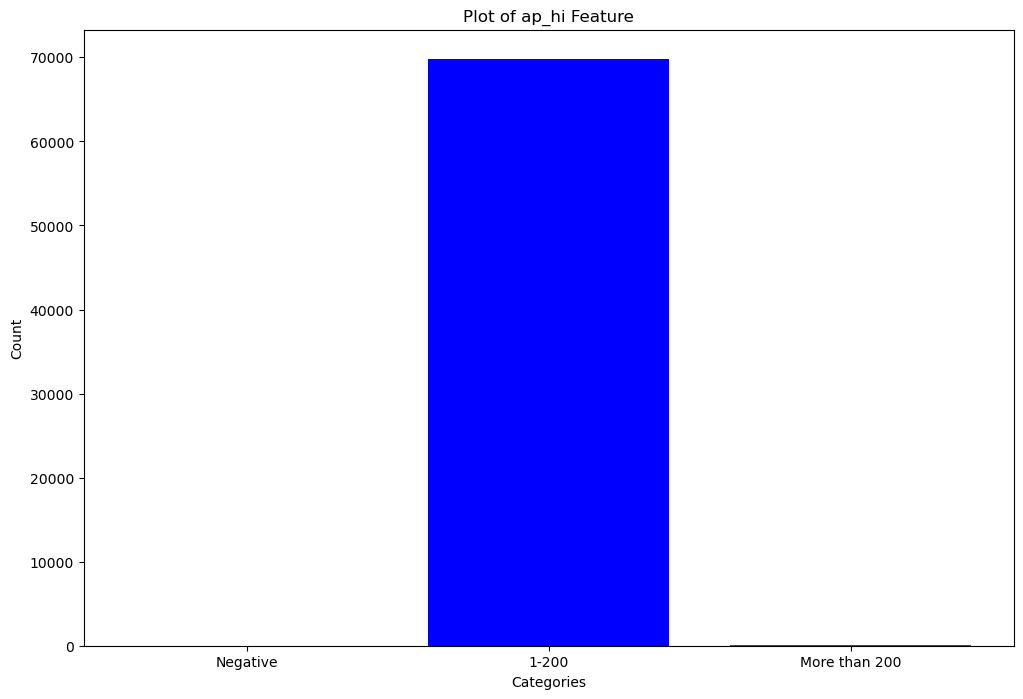

In [28]:
ap_hi_counts_plot = pd.DataFrame({
    'Category': ['Negative', '1-200', 'More than 200'],
    'Count': [ap_hi_counts_negative, ap_hi_counts_1_to_200, ap_hi_counts_more_than_200]
})

plt.figure(figsize=(12, 8))
plt.bar(ap_hi_counts_plot['Category'], ap_hi_counts_plot['Count'], color=['red', 'blue', 'green'])
plt.title("Plot of ap_hi Feature")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [29]:
data = data[(data['ap_hi'] > 0) & (data['ap_hi'] <= 200)]

##### Summary Tekanan Darah Sistolik > 0 dan <= 200
Berdasarkan informasi di atas, terlihat bahwa terdapat 7 data yang bernilai negatif dan 100 data yang bernilai lebih dari 200. Seperti yang sudah dijelaskan sebelumnya, angka tersebut merupakan angka yang tidak mungkin untuk nilai tekanan darah sistolik. Selain itu, jumlah data yang tidak signifikan juga dapat mengindikasikan bahwa data tersebut kemungkinan besar merupakan kesalahan pencatatan, kesalahan entri data, atau anomali yang tidak masuk akal secara medis. Oleh karena itu, data tersebut tidak akan digunakan dalam project ini. Model akan dilatih dengan data ap_hi yang berada dalam rentang 1-200 untuk memastikan data tersebut valid, logis, dan relevan secara medis. Penggunaan data dalam rentangg yang logis dan valid ini akan memastikan konsistensi distribusi data, menghindari bias, serta meningkatkan kinerja model.

#### **Tekanan Darah Diastolik (ap_lo)**

In [30]:
ap_lo_counts = data['ap_lo'].value_counts()

print(ap_lo_counts)

ap_lo
80     34792
90     14279
70     10227
100     4069
60      2716
       ...  
118        1
56         1
182        1
810        1
602        1
Name: count, Length: 155, dtype: int64


In [31]:
ap_lo_counts_negative = (data['ap_lo'] <= 0).sum()
ap_lo_counts_1_to_200 = ((data['ap_lo'] > 0) & (data['ap_lo'] <= 200)).sum()
ap_lo_counts_more_than_200 = (data['ap_lo'] > 200).sum()

print(f'ap_lo Negative Value: {ap_lo_counts_negative}')
print(f'ap_lo 1 to 200 Value: {ap_lo_counts_1_to_200}')
print(f'ap_lo More Than 200 Value: {ap_lo_counts_more_than_200}')

ap_lo Negative Value: 15
ap_lo 1 to 200 Value: 68842
ap_lo More Than 200 Value: 942


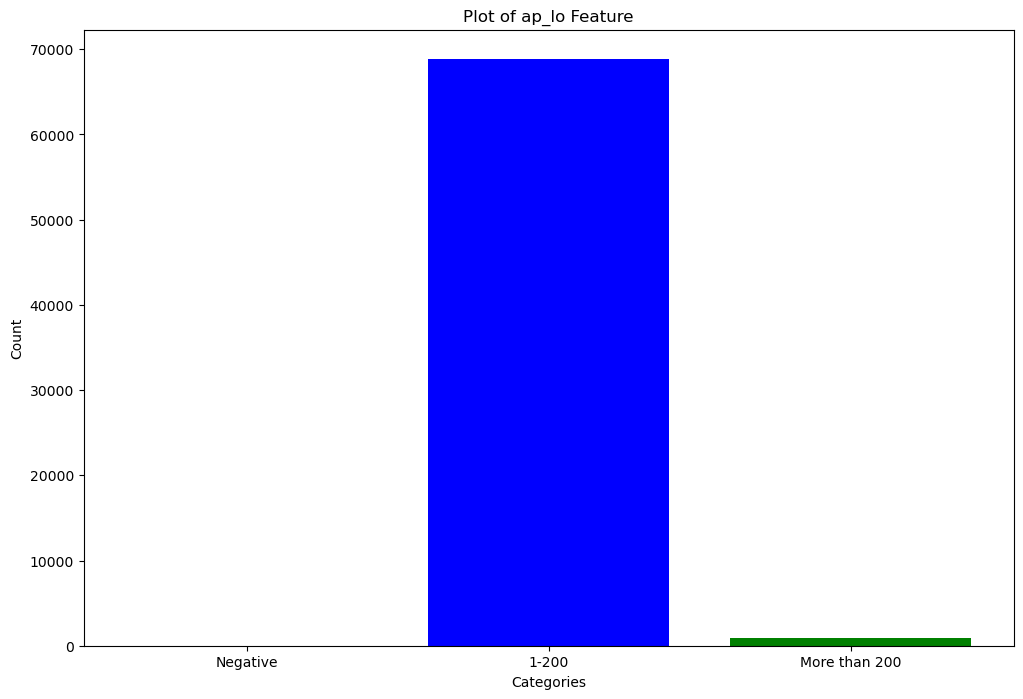

In [32]:
ap_lo_counts_plot = pd.DataFrame({
    'Category': ['Negative', '1-200', 'More than 200'],
    'Count': [ap_lo_counts_negative, ap_lo_counts_1_to_200, ap_lo_counts_more_than_200]
})

plt.figure(figsize=(12, 8))
plt.bar(ap_lo_counts_plot['Category'], ap_lo_counts_plot['Count'], color=['red', 'blue', 'green'])
plt.title("Plot of ap_lo Feature")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [33]:
data = data[(data['ap_lo'] > 0) & (data['ap_lo'] <= 200)]

### Summary Tekanan Darah Diastolik > 0 dan <= 200
Berdasarkan analisis data tersebut, diperoleh 15 data yang bernilai negatif dan 945 data yang bernilai lebih dari 200. Tekanan darah diastolik yang bernilai negatif ataupun bernilai lebih dari 200 merupakan angka yang tidak mungkin terjadi dalam dunia nyata. Oleh karena itu, dapat disimpulkan bahwa data tersebut tidak masuk akal. Jika dibandingkan dengan jumlah keseluruhan data, data abnormal tersebut tidak memiliki jumlah yang signifikan, maka data tersebut dapat diabaikan, sehingga data yang akan digunakan hanya data ap_lo yang berada dalam rentang 1-200. Penggunaan data yang berada dalam rentang yang logis bertujuan untuk memastikan data tersebut valid dan relevan secara medis agar dapat memastikan konsistensi distribusi data, menghindari bias, serta meningkatkan kinerja model.

#### **Cholesterol Feature**

In [34]:
cholesterol_value_counts = data['cholesterol'].value_counts()
max_index = cholesterol_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in cholesterol_value_counts.index]

print(cholesterol_value_counts)

cholesterol
1    51650
2     9313
3     7879
Name: count, dtype: int64


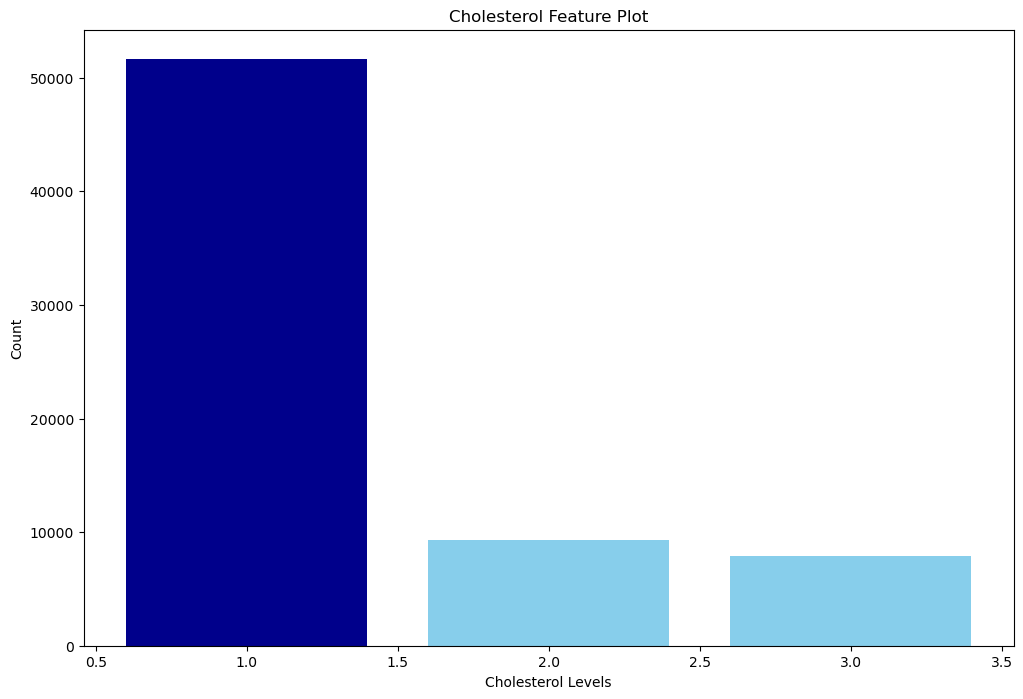

In [35]:
plt.figure(figsize=(12, 8))
plt.bar(cholesterol_value_counts.index, cholesterol_value_counts.values, color=colors)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.title('Cholesterol Feature Plot')
plt.show()

In [36]:
# mengecek apakah ada data yang outlier (bukan 1, 2, atau 3)
invalid_cholesterol = data[~data['cholesterol'].isin([1, 2, 3])]

print(f"Jumlah data dengan nilai cholesterol tidak valid: {len(invalid_cholesterol)}")

Jumlah data dengan nilai cholesterol tidak valid: 0


Data 'cholesterol' dijelaskan dalam 3 kategori, yaitu normal (1), di atas normal (2), dan jauh di atas normal (3). Berdasarkan informasi dan plotting di atas, nilai 1 memiliki jumlah data terbanyak dibandingkan 2 lainnya, yang berarti mayoritas individu memiliki kadar kolesterol normal. Pada plotting tersebut, distribusi yang dominan lebih ditekankan dengan pewarnaan yang berbeda. Hal tersebut ditujukan untuk mempermudah analisis, membantu fokus analisis pada pola distribusi yang signifikan, serta memahami prioritas data untuk analisis lebih lanjut.

#### **Gluc Feature**

In [37]:
gluc_value_counts = data['gluc'].value_counts()
max_index = gluc_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in gluc_value_counts.index]

print(gluc_value_counts)

gluc
1    58531
3     5236
2     5075
Name: count, dtype: int64


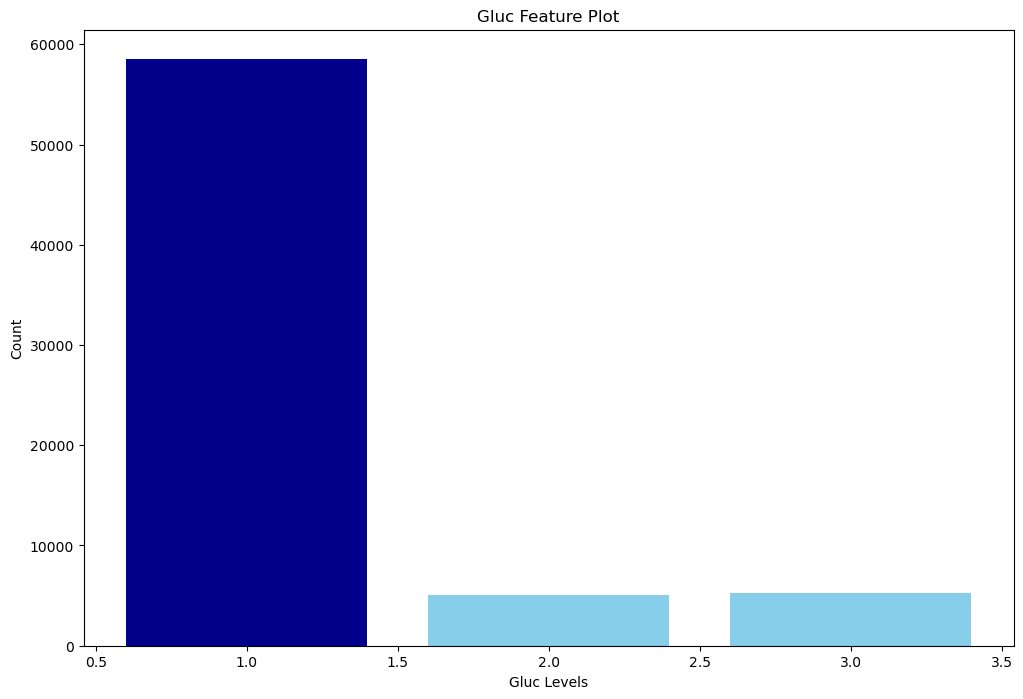

In [38]:
plt.figure(figsize=(12, 8))
plt.bar(gluc_value_counts.index, gluc_value_counts.values, color=colors)
plt.xlabel('Gluc Levels')
plt.ylabel('Count')
plt.title('Gluc Feature Plot')
plt.show()

In [39]:
# mengecek apakah ada data yang outlier (bukan 1, 2, atau 3)
invalid_gluc = data[~data['gluc'].isin([1, 2, 3])]

print(f"Jumlah data dengan nilai gluc tidak valid: {len(invalid_gluc)}")

Jumlah data dengan nilai gluc tidak valid: 0


Data 'gluc' juga dijelaskan dalam 3 kategori, yaitu normal (1), di atas normal (2), dan jauh di atas normal (3). Berdasarkan informasi dan plotting di atas, dapat disimpulkan bahwa sebagian besar individu memiliki kadar glukosa yang normal, terlihat dari distribusi data pada nilai 1 yang jauh lebih signifikan. Penekanan pada kategori 1 dalam plotting tersebut membantu memfokuskan pola yang paling signifikan dalam data, sehingga mempermudah analisis dan pemahaman terhadap distribusi utama.

#### **Smoke Feature**

In [40]:
smoke_value_counts = data['smoke'].value_counts()
max_index = smoke_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in smoke_value_counts.index]

print(smoke_value_counts)

smoke
0    62794
1     6048
Name: count, dtype: int64


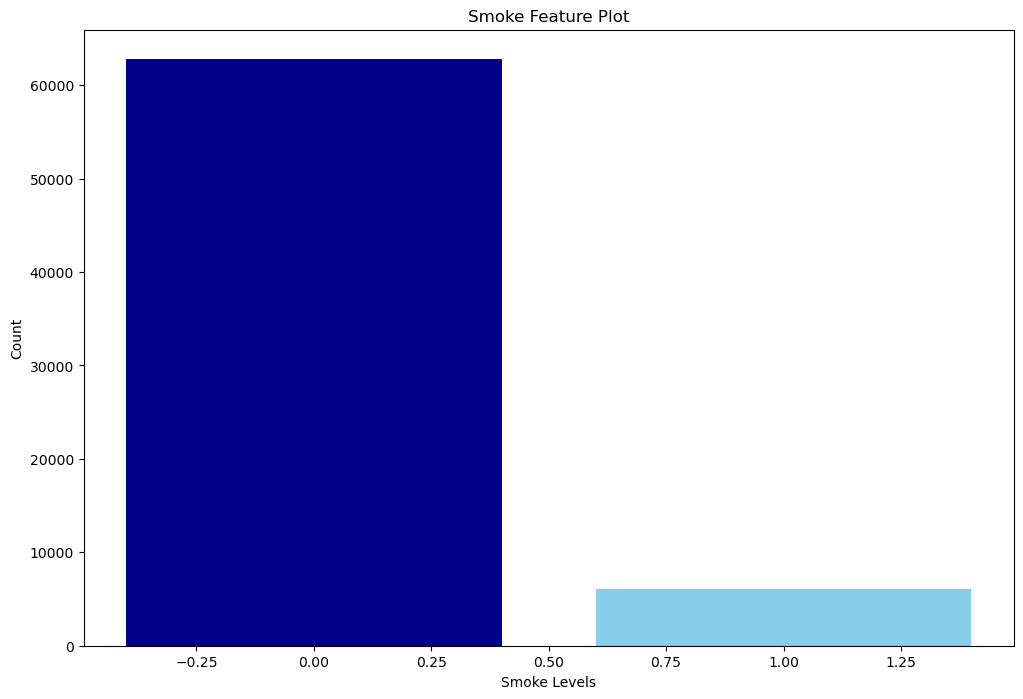

In [41]:
plt.figure(figsize=(12, 8))
plt.bar(smoke_value_counts.index, smoke_value_counts.values, color=colors)
plt.xlabel('Smoke Levels')
plt.ylabel('Count')
plt.title('Smoke Feature Plot')
plt.show()

In [42]:
# mengecek apakah ada data yang outlier (bukan 0, 1)

invalid_smoke= data[~data['smoke'].isin([0, 1])]

print(f"Jumlah data dengan nilai smoke tidak valid: {len(invalid_smoke)}")

Jumlah data dengan nilai smoke tidak valid: 0


Dari data ini, kita bisa melihat perbandingan jumlah individu yang merokok dan tidak merokok. Ada sebanyak 62,830 individu yang tidak merokok, sedangkan 6,051 individu tercatat sebagai perokok. Jumlah ini menunjukkan ketidakseimbangan yang cukup signifikan, di mana kelompok non-perokok mendominasi lebih dari 90% dari total populasi.

Hal ini menarik untuk dicermati karena kebiasaan tidak merokok yang lebih besar dapat mencerminkan pola hidup yang lebih sehat di kelompok data ini. Sebaliknya, meskipun jumlah perokok relatif kecil, mereka tetap perlu dianalisis dengan saksama, terutama jika kita sedang mempelajari hubungan antara kebiasaan merokok dan risiko kardiovaskular.

Untuk mempermudah interpretasi, kita dapat memberikan perhatian khusus pada kelompok non-perokok yang jumlahnya paling besar. 

#### **Alco Feature**

In [43]:
alco_value_counts = data['alco'].value_counts()
max_index = alco_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in alco_value_counts.index]

print(alco_value_counts)

alco
0    65156
1     3686
Name: count, dtype: int64


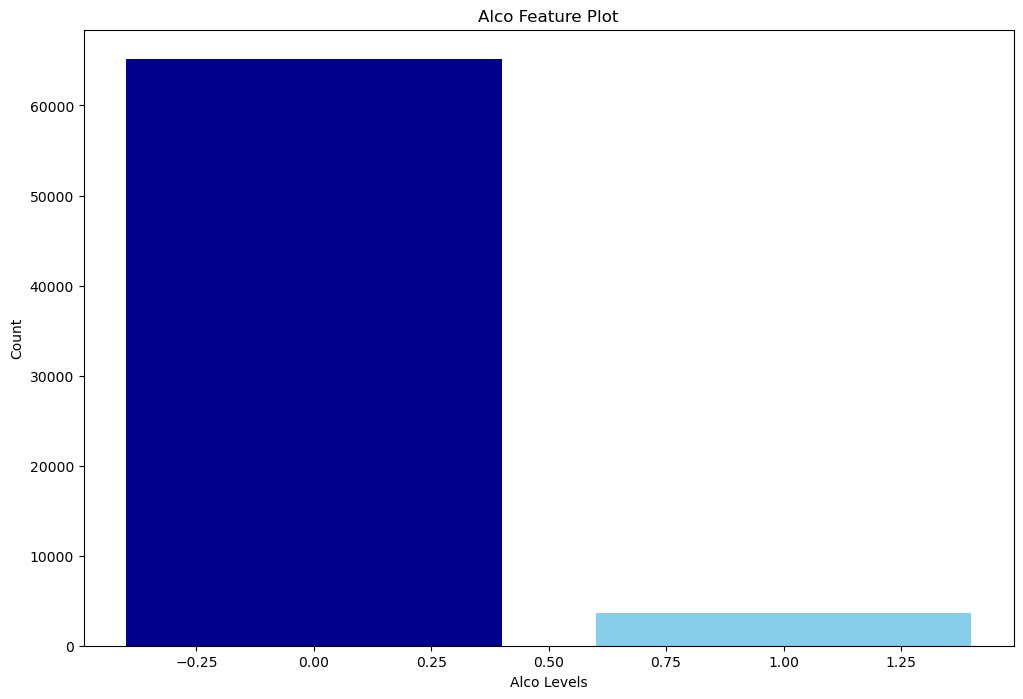

In [44]:
plt.figure(figsize=(12, 8))
plt.bar(alco_value_counts.index, alco_value_counts.values, color=colors)
plt.xlabel('Alco Levels')
plt.ylabel('Count')
plt.title('Alco Feature Plot')
plt.show()

In [45]:
# mengecek apakah ada data yang outlier (bukan 0, 1)

invalid_alco = data[~data['alco'].isin([0, 1])]

print(f"Jumlah data dengan nilai alco tidak valid: {len(invalid_alco)}")

Jumlah data dengan nilai alco tidak valid: 0


Dari data ini, terlihat perbedaan yang cukup mencolok antara individu yang mengonsumsi alkohol dan yang tidak. Sebanyak 65,190 individu tidak mengonsumsi alkohol, sementara hanya 3,691 individu yang tercatat mengonsumsi alkohol.

Mayoritas individu tampaknya menjalani pola hidup yang bebas dari konsumsi alkohol—mungkin karena kesadaran akan kesehatan, budaya, atau pembatasan tertentu. Namun, meskipun kelompok yang mengonsumsi alkohol relatif kecil, mereka tetap relevan untuk dianalisis, terutama jika kita mempelajari dampak alkohol terhadap risiko kesehatan kardiovaskular.

#### **Active Feature**

In [46]:
active_value_counts = data['active'].value_counts()
max_index = active_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in active_value_counts.index]

print(active_value_counts)

active
1    55295
0    13547
Name: count, dtype: int64


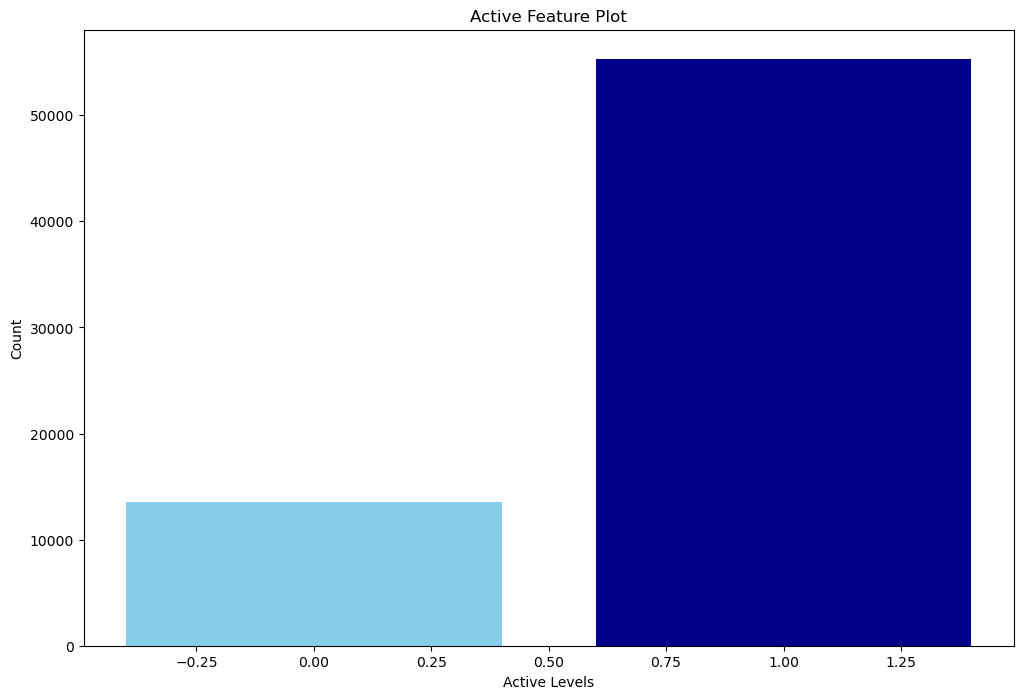

In [47]:
plt.figure(figsize=(12, 8))
plt.bar(active_value_counts.index, active_value_counts.values, color=colors)
plt.xlabel('Active Levels')
plt.ylabel('Count')
plt.title('Active Feature Plot')
plt.show()

In [48]:
# mengecek apakah ada data yang outlier (bukan 0, 1)

invalid_active = data[~data['active'].isin([0, 1])]

print(f"Jumlah data dengan nilai active tidak valid: {len(invalid_active)}")

Jumlah data dengan nilai active tidak valid: 0


Dari data ini, kita bisa melihat bahwa mayoritas individu memiliki aktivitas fisik yang cukup aktif. Sebanyak 55,330 individu tercatat aktif secara fisik (1), sedangkan 13,551 individu tidak aktif secara fisik (0).

Untuk memperjelas data ini, kita dapat memberikan warna biru gelap pada kelompok aktif secara fisik, yang merupakan mayoritas. Penonjolan ini tidak hanya membantu untuk memahami proporsi data dengan cepat tetapi juga memberikan kesan positif pada kelompok yang lebih sehat.

#### **Label Cardio**

In [49]:
cardio_value_counts = data['cardio'].value_counts()
max_index = cardio_value_counts.idxmax()
colors = ['darkblue' if x == max_index else 'skyblue' for x in cardio_value_counts.index]

print(cardio_value_counts)

cardio
0    34791
1    34051
Name: count, dtype: int64


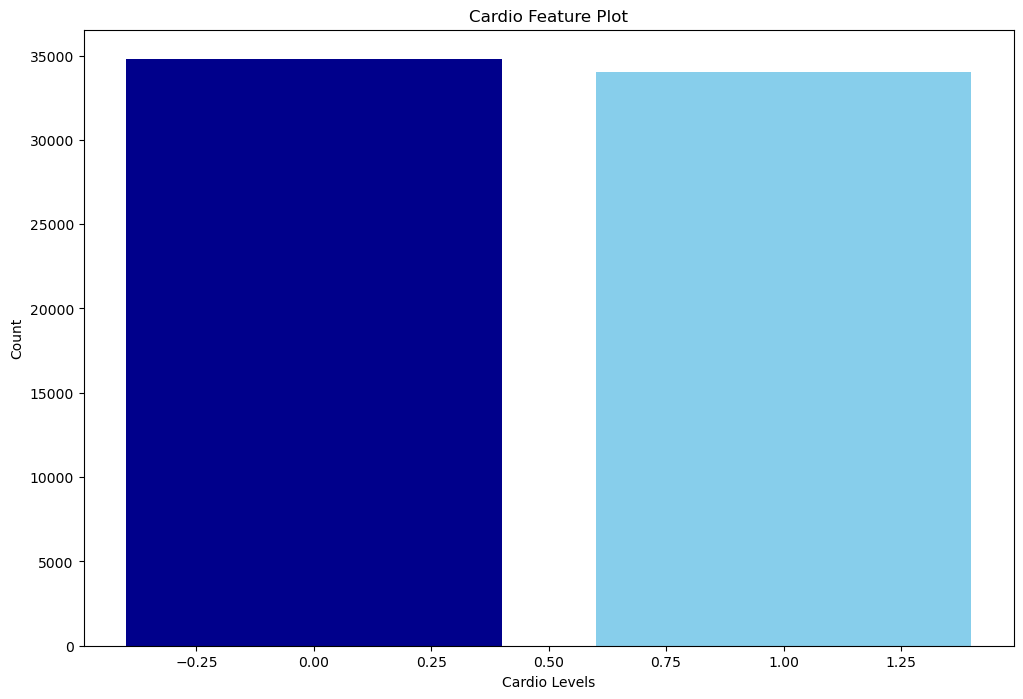

In [50]:
plt.figure(figsize=(12, 8))
plt.bar(cardio_value_counts.index, cardio_value_counts.values, color=colors)
plt.xlabel('Cardio Levels')
plt.ylabel('Count')
plt.title('Cardio Feature Plot')
plt.show()

In [51]:
# mengecek apakah ada data yang outlier (bukan 0, 1)

invalid_cardio = data[~data['cardio'].isin([0, 1])]

print(f"Jumlah data dengan label cardio yang tidak valid: {len(invalid_cardio)}")

Jumlah data dengan label cardio yang tidak valid: 0


Dalam kolom cardio, label 0 dan 1 digunakan untuk menggambarkan risiko kardiovaskular:
1. 0 berarti individu tidak memiliki risiko kardiovaskular.
2. 1 berarti individu memiliki risiko kardiovaskular.

Jumlah Individu Berdasarkan Risiko:
1. 34,807 individu tidak memiliki risiko kardiovaskular.
2. 34,074 individu memiliki risiko kardiovaskular.

Dengan jumlah yang hampir seimbang antara kedua kategori, ini adalah hal yang positif dalam konteks machine learning. Sebuah dataset yang seimbang memungkinkan model untuk belajar secara adil, tanpa bias yang kuat terhadap salah satu kategori.

Namun, analisis lebih lanjut tetap diperlukan untuk memahami faktor-faktor apa saja yang menyebabkan seseorang memiliki risiko kardiovaskular. 

In [52]:
data.describe(include='all')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000
mean,53.325608,1.348436,1.644127,74.060761,126.256878,81.323785,1.364182,1.225836,0.087853,0.053543,0.803216,0.494625
std,6.761746,0.476478,0.079137,14.128736,17.508785,9.746091,0.678573,0.571800,0.283084,0.225115,0.397571,0.499975
min,29.583562,1.000000,1.200000,30.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.375342,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.972603,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.419178,2.000000,1.700000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,2.500000,160.000000,200.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Summary Mengatasi Outliers:
1. Gender Feature
- Jumlah Data: 45,530 perempuan dan 24,470 laki-laki.
- Ketidakseimbangan gender signifikan, lebih banyak perempuan daripada laki-laki.
- Tidak ada outlier pada fitur ini karena merupakan data kategori.

2. Height Feature
- Tinggi badan di bawah 120 cm dianggap tidak mungkin untuk usia 29,5 – 65 tahun.
- Sehingga, data individu dengan tinggi < 1.2 meter dihapus. Sebaran tinggi badan normal antara 1.59–1.7 meter (25th–75th percentile).

3. Weight Feature
- Berat badan < 30 kg dan > 160 kg dianggap outlier karena tidak wajar untuk manusia dewasa.
- Sehingga, data dengan berat badan di luar rentang 30–160 kg dihapus untuk menjaga validitas distribusi data.

4. Tekanan Darah Sistolik (ap_hi)
- Nilai negatif dan > 200 tidak realistis secara medis.
- Sehingga, data di luar rentang 1–200 dihapus (7 data negatif, 100 data > 200).

5. Tekanan Darah Diastolik (ap_lo)
- Nilai negatif dan > 200 dianggap tidak mungkin terjadi.
- Sehingga, data di luar rentang 1–200 dihapus (15 data negatif, 945 data > 200).

6. Cholesterol Feature
- Kategori:
1 = Normal;
2 = Di atas normal;
3 = Jauh di atas normal;
- Mayoritas individu memiliki kadar kolesterol normal (kategori 1).
- Tidak ada outlier pada fitur kategori ini.

7. Gluc Feature
- Kategori:
1 = Normal;
2 = Di atas normal;
3 = Jauh di atas normal;
- Mayoritas individu memiliki kadar glukosa normal (kategori 1).
- Tidak ada outlier pada fitur kategori ini.
\
8. Smoke Feature
- Dari data dapat dilihat bahwa ada 62,830 non-perokok, 6,051 perokok.
- Ada Ketidakseimbangan signifikan, non-perokok mendominasi > 90%.
- Tidak ada outlier karena ini data kategori.

9. Alco Feature
- 65,190 individu tidak minum alkohol, 3,691 individu minum alkohol.
- Ketidakseimbangan signifikan dengan mayoritas tidak mengonsumsi alkohol.
- Tidak ada outlier karena ini data kategori.

10. Active Feature
- 55,330 individu aktif, 13,551 individu tidak aktif.
- Mayoritas individu memiliki aktivitas fisik yang baik.
- Tidak ada outlier karena ini data kategori.

11. Label Cardio
- Distribusi:
0 (Tidak berisiko): 34,807 individu;
1 (Berisiko): 34,074 individu; 
- Dataset seimbang, baik untuk keperluan machine learning.
- Tidak ada outlier karena ini data kategori.

# **Data Duplication**

In [53]:
duplicates = data.duplicated()

print('Baris Duplikat:')
print(data[duplicates])

Baris Duplikat:
             age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
10562  56.150685       1    1.65    70.0    120     80            1     1   
21784  46.008219       1    1.65    68.0    120     80            1     1   
38505  52.021918       1    1.64    65.0    120     80            1     1   
40365  39.868493       1    1.58    64.0    120     80            1     1   
42450  50.282192       1    1.69    67.0    120     80            1     1   
44653  46.402740       2    1.70    70.0    120     80            1     1   
45125  58.301370       1    1.65    65.0    120     80            1     1   
45748  60.484932       1    1.75    69.0    120     80            1     1   
45810  58.164384       1    1.64    62.0    120     80            1     1   
48917  60.123288       1    1.65    60.0    120     80            1     1   
50432  47.926027       2    1.69    74.0    120     80            1     1   
52552  60.117808       1    1.65    65.0    120     80      

Pada topik ini, keberadaan duplikasi data tidak menjadi masalah besar. Karena setiap orang bisa saja mempunyai berat, tinggi dan riwayat yang sama. Oleh karena itu, data duplikat tidak dihapus dan tetap digunakan untuk memastikan representasi populasi yang akurat dan menjaga distribusi data tetap konsisten.

# **Data Categorical and Numerical**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68842 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68842 non-null  float64
 1   gender       68842 non-null  int64  
 2   height       68842 non-null  float64
 3   weight       68842 non-null  float64
 4   ap_hi        68842 non-null  int64  
 5   ap_lo        68842 non-null  int64  
 6   cholesterol  68842 non-null  int64  
 7   gluc         68842 non-null  int64  
 8   smoke        68842 non-null  int64  
 9   alco         68842 non-null  int64  
 10  active       68842 non-null  int64  
 11  cardio       68842 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.8 MB


##### Summary:
Identifikasi jenis data diperlukan untuk menentukan bagaimana setiap data akan diproses. Jenis data yang dimaksud adalah data kategorikal dan data numerik. Algoritma machine learning umumnya hanya membaca dan menganalisis data numerik, sehingga data kategorikal perlu dikonversi menjadi format numerik melalui proses encoding. Selain itu, data numerik juga harus melalui beberapa proses pengolahan data, seperti pemeriksaan outlier, pemeriksaan distribusi data, atau pemrosesan normalisasi atau standarisasi.

Sampai pada tahap ini, dapat dilihat bahwa semua datanya merupakan data numerik, sehingga tidak perlu adanya proses encoding, baik One-Hot Encoding maupun Label Encoding. Oleh karena itu, data ini sudah sangat baik untuk diproses lebih lanjut dan digunakan dalam analisis dan pelatihan model machine learning. Selain itu, data numerik ini akan meminimalisir terjadinya risiko kesalahan dalam pengolahan data.

# **Exploratory and Explanatory Data**

In [55]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,1.56,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,1.69,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,1.56,56.0,100,60,1,1,0,0,0,0


#### **Melihat Persentase Missing Values**

In [56]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({
  'Missing Values': missing_values,
  'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


Missing values tidak muncul yang artinya tidak ada missing values dalam dataset. Hal ini menandakan bahwa data lengkap dan siap untuk dianalisis tanpa memerlukan langkah pengisian atau penghapusan data yang hilang.

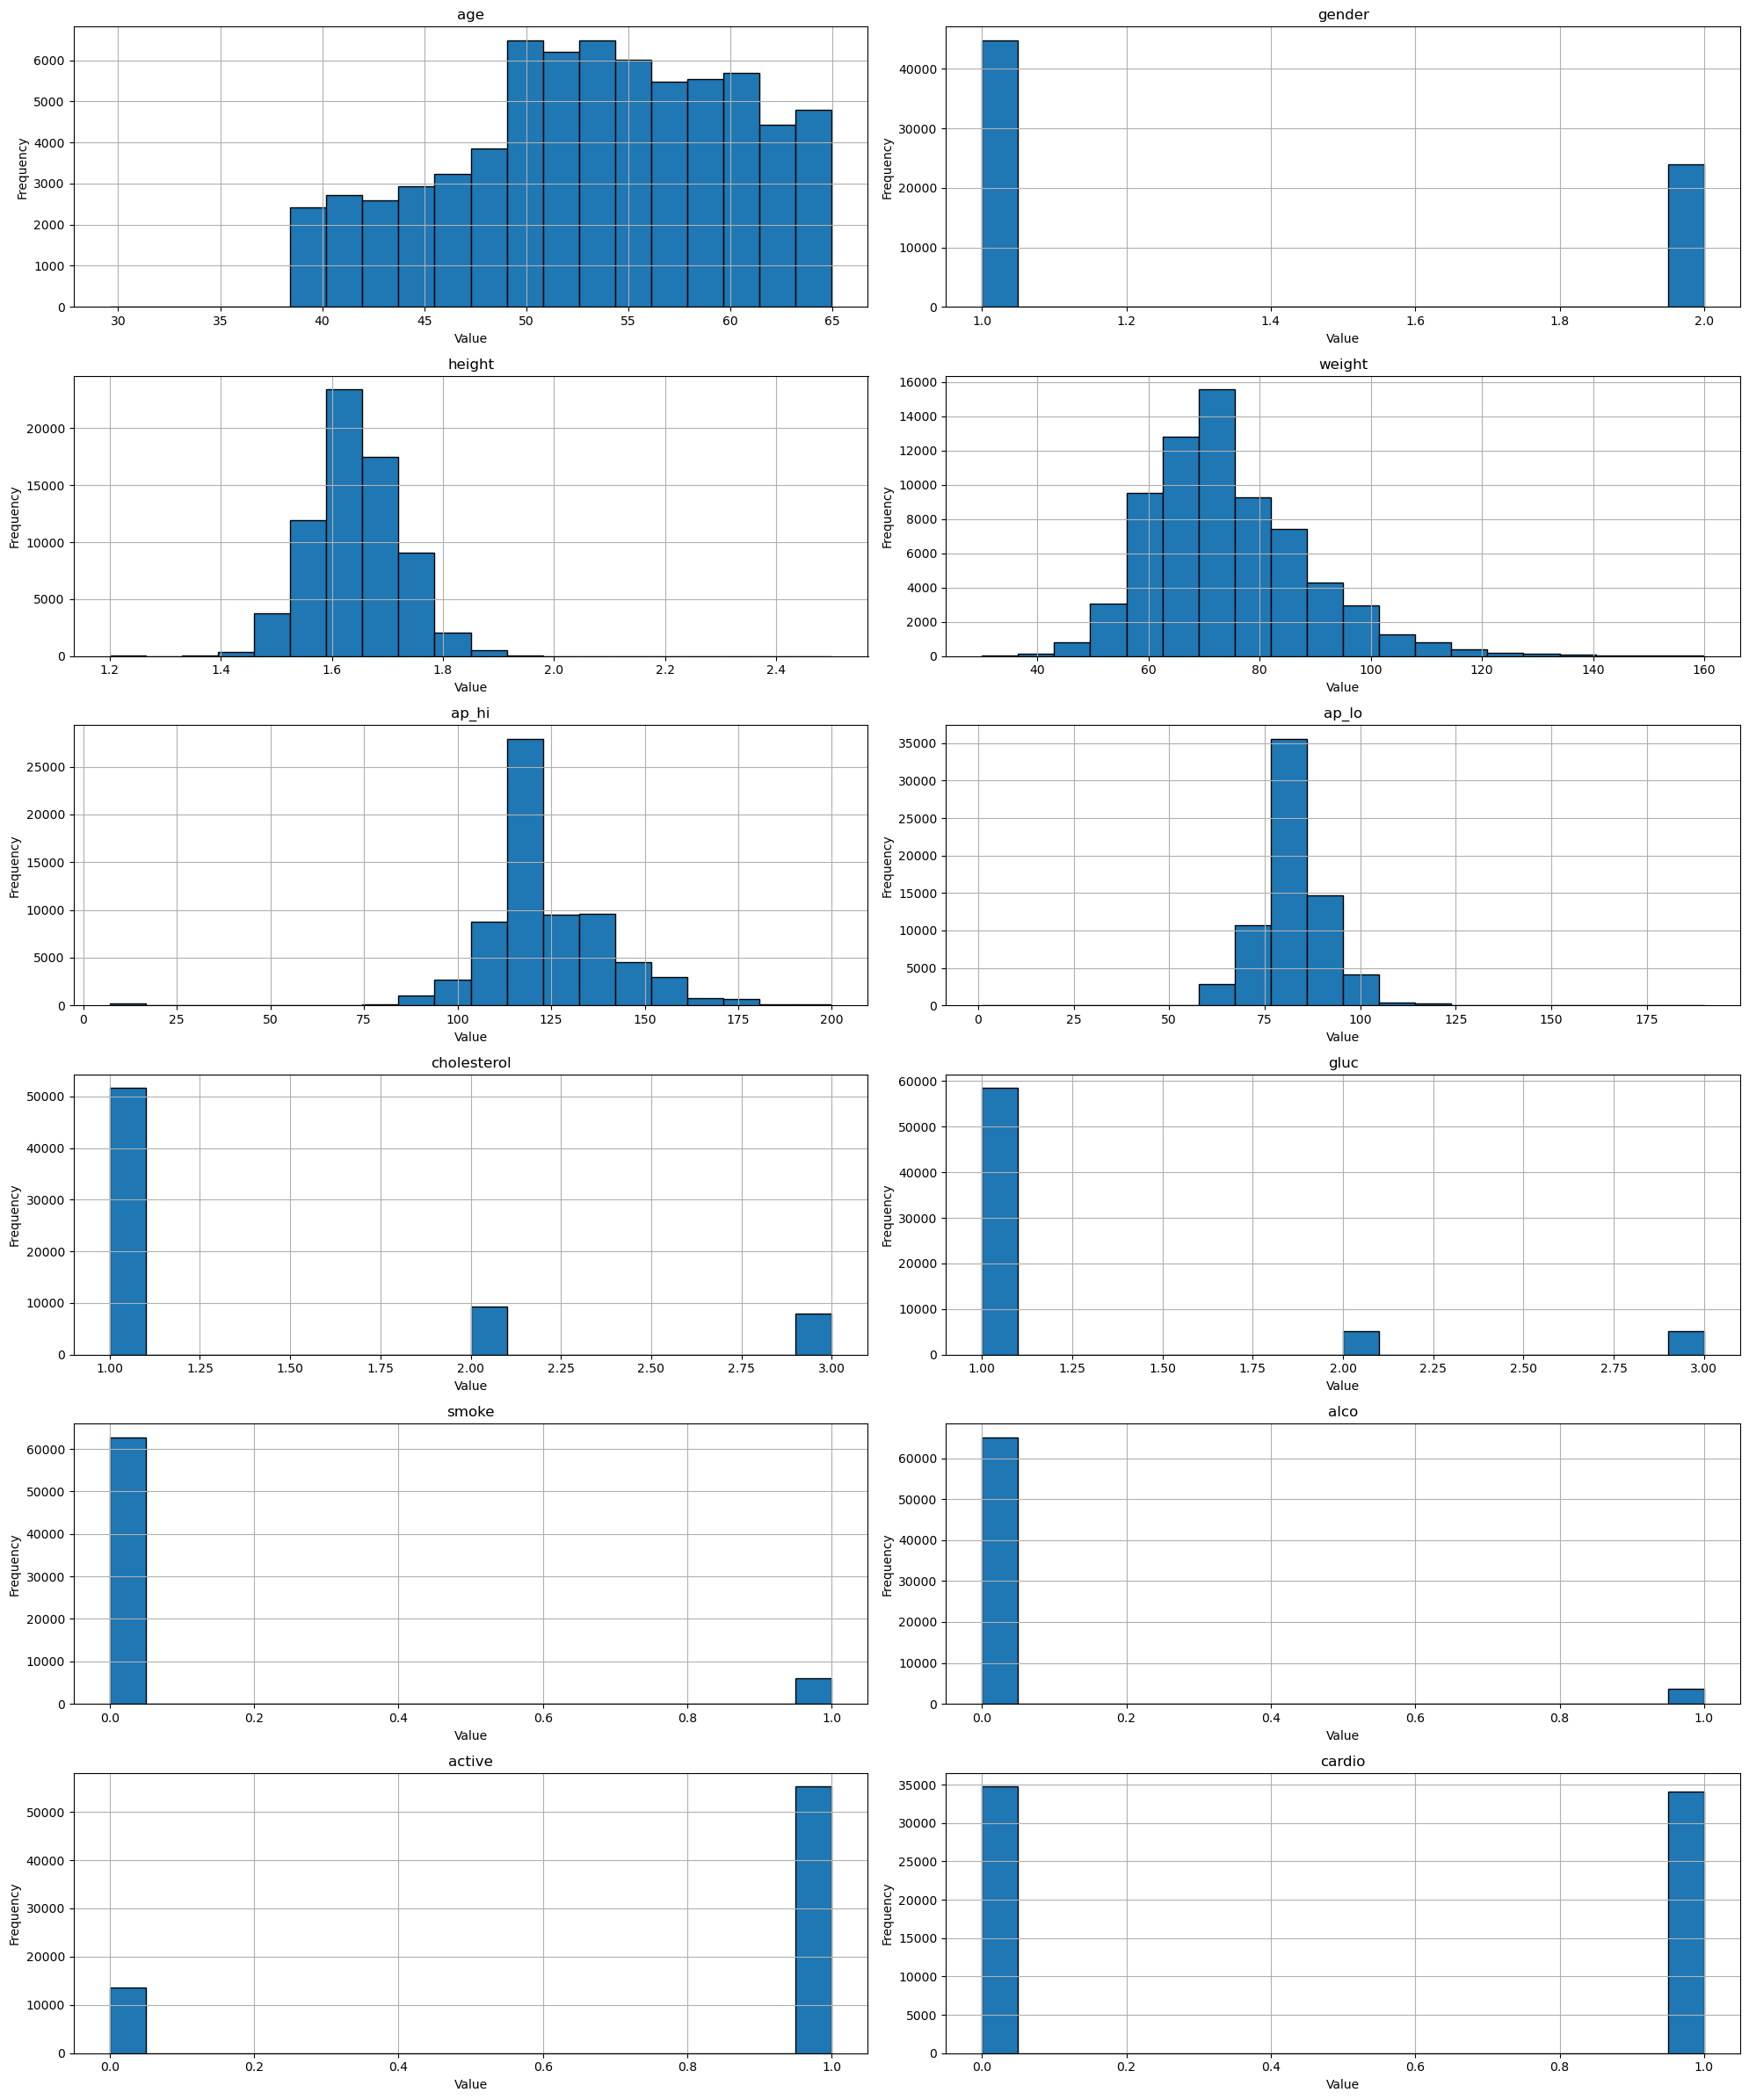

In [57]:
# Menghitung jumlah variabel
num_vars = data.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 2  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(data.columns):
    data[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

##### Plotting Histogram
Plotting bertujuan untuk eksplorasi awal data yang membantu memahami karakteristik dan distribusi data pada masing-masing kolom. Pada tahap ini, plotting histogram digunakan untuk melihat gambaran umum terkait distribusi data dari semua variabel yang ada dalam dataset. Distribusi data tersebut direpresentasikan berdasarkan frekuensi data dalam interval tertentu.

Analisis plot histogram di atas :
- **age** : Konsentrasi data yang lebih tinggi pada rentang usia 50-60 tahun menyebabkan distribusi menjadi tidak simetris.
- **gender** : Distribusi gender menunjukkan adanya ketidakseimbangan, di mana nilai 1 memiliki jumlah yang lebih besar, yang berarti dataset ini lebih banyak merepresentasikan gender perempuan.
- **height** : Distribusi tinggi badan mendekati normal dengan mayortias datanya berada pada rentang tinggi badan 1.6-1.7 m.
- **weight** : Distribusi berat badan juga memiliki distribusi data yang hampir mendekati normal dengan puncaknya berada pada rentang 60-80 kg.
- **ap_hi** : Pola distribusi terlihat hampir normal, tetapi terdapat beberapa outlier pada nilai yang sangat rendah dan sangat tinggi.
- **ap_lo** : Distribusi data serupa dengan ap_hi, tetapi dengan rentang yang lebih kecil. Selain itu, terdapat beberapa outlier pada nilai ekstrem. 
- **cholesterol** : Data diwakili dengan 3 nilai, yaitu 1-normal, 2-di atas normal, dan 3-jauh di atas normal. Distribusi data terkonsentrasi pada nilai 1, yang berarti mayoritas individu memiliki kadar kolesterol normal.
- **gluc** : Data 'gluc' juga diwakili oleh 3 nilai yang sama dengan data 'cholesterol'. Nilai 1 mendominasi distribusi data, berarti sebagian besar individu memiliki kadar glukosa normal.
- **smoke** : Data ini diwakili oleh nilai biner, yaitu 0-tidak merokok dan 1-merokok. Distribusi data terlihat dominan pada nilai 0, hal ini menunjukkan bahwa individu yang tidak merokok lebih banyak daripada individu yang merokok. 
- **alco** : Data 'alco' yang berisi informasi "alcohol intake" juga diwakili oleh nilai biner, dengan nilai 0 untuk tidak konsumsi alkohol dan nilai 1 untuk konsumsi alkohol. Distribusi data terlihat tidak seimbang dan hanya terpusat pada nilai 0, yang berarti mayoritas individu tidak mengonsumsi alkohol.
- **active** : Data 'active' yang merujuk pada "physical activity" juga memiliki nilai biner, di mana nilai 0 menunjukkan bahwa individu tidak melakukan aktivitas fisik dan nilai 1 menunjukkan bahwa individu melakukan aktivitas fisik. Distribusi data terlihat dominan pada nilai 1, hal ini menunjukkan bahwa sebagian besar individu aktif melakukan aktivitas fisik.
- **cardio** : Data 'cardio' juga diwakili dengan nilai biner, yaitu 0 untuk tidak memiliki penyakit kardiovaskular dan 1 untuk memiliki penyakit kardiovaskular. Distribusi data terlihat cukup seimbang antara kedua nilai tersebut.

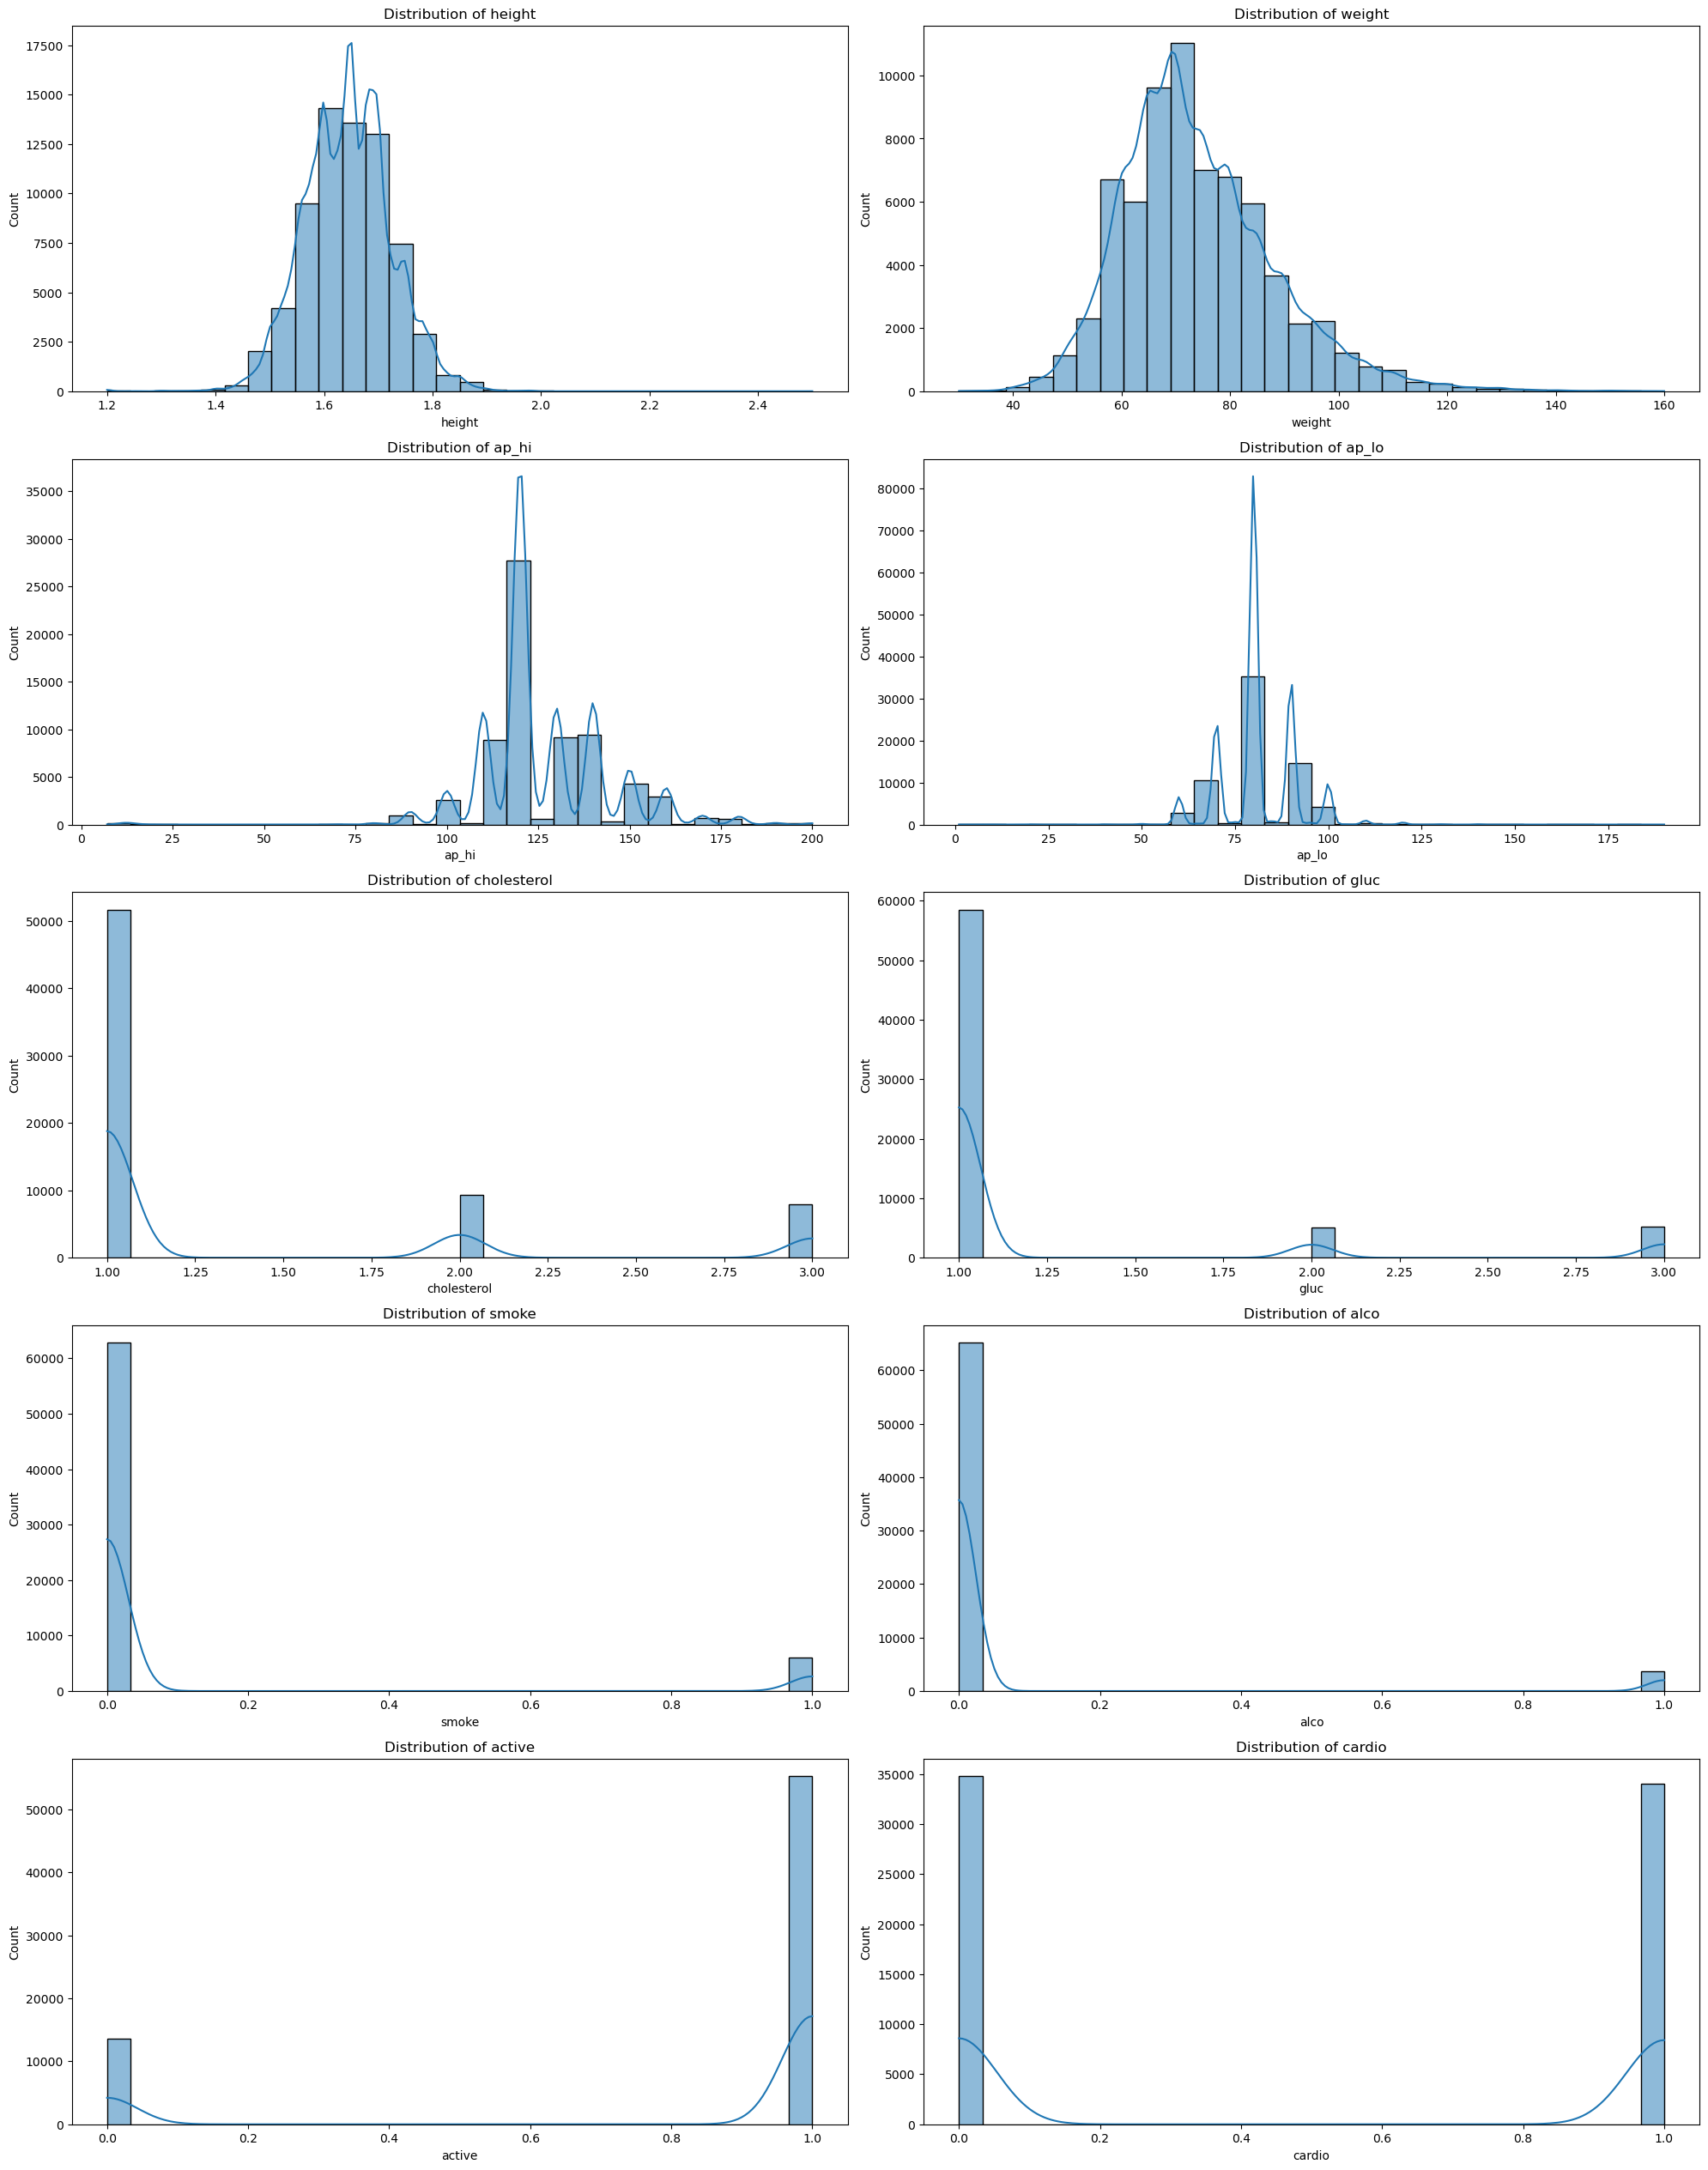

In [58]:
columns_to_plot = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
 
plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

1. **Distribution of Height**
- Grafik menunjukkan distribusi tinggi badan individu dalam dataset.Data membentuk distribusi mendekati normal, dengan puncak di sekitar 1.6 hingga 1.7 meter.
- Ada beberapa nilai di luar rentang umum yang dapat dianggap sebagai outlier, seperti tinggi kurang dari 1.4 meter atau lebih dari 2 meter.
2. **Distribution of Weight**
- Grafik menunjukkan distribusi berat badan individu. Puncak distribusi berada di sekitar 70 kg, dengan pola distribusi mendekati normal.
- Beberapa nilai yang sangat rendah (misalnya, di bawah 30 kg) atau sangat tinggi (di atas 150 kg) terlihat sebagai outlier.
3. **Distribution of Age (age_hi dan age_lo)**
- Distribusi ini merepresentasikan usia dalam dua rentang berbeda. Sebagian besar individu berada pada usia dewasa muda hingga paruh baya, dengan sedikit individu pada usia lanjut.
- Data tampak memiliki rentang yang besar, tetapi ada pola yang mendominasi di usia sekitar 40-60 tahun.
4. **Distribution of Cholesterol**
- Mayoritas individu memiliki level kolesterol 1 (normal). Ada peningkatan signifikan di level 2 (tinggi) dan 3 (sangat tinggi), meskipun jumlahnya lebih sedikit dibandingkan level normal.
- Distribusi ini menunjukkan bahwa kolesterol normal mendominasi dataset.
5. **Distribution of Gluc**
- Pola distribusi gula darah mirip dengan kolesterol: mayoritas individu memiliki level 1 (normal). Hanya sedikit individu yang berada di level 2 (tinggi) atau 3 (sangat tinggi).
6. **Distribution of Smoke**
- Mayoritas individu adalah non-perokok (0), dengan hanya sebagian kecil yang merupakan perokok aktif (1). Hal ini memberikan informasi penting untuk analisis risiko kesehatan terkait kebiasaan merokok.
7. **Distribution of Alco**
- Sebagian besar individu tidak mengonsumsi alkohol (0), sementara yang mengonsumsi (1) hanya sedikit. Pola ini mencerminkan kebiasaan sehat dari sebagian besar individu dalam dataset.
8. **Distribution of Active**
- Sebagian besar individu termasuk aktif secara fisik (1), sedangkan yang tidak aktif (0) lebih sedikit. Aktivitas fisik yang tinggi dapat menjadi faktor pelindung dari risiko penyakit kardiovaskular.
9. **Distribution of Cardio**
- Label risiko kardiovaskular menunjukkan dua kategori:
0 (tidak memiliki risiko) dengan jumlah 34,807 individu; 
1 (memiliki risiko) dengan jumlah 34,074 individu.
- Jumlah ini hampir seimbang, memberikan peluang yang baik untuk pelatihan model prediktif tanpa bias kategori.

# **Heatmap**

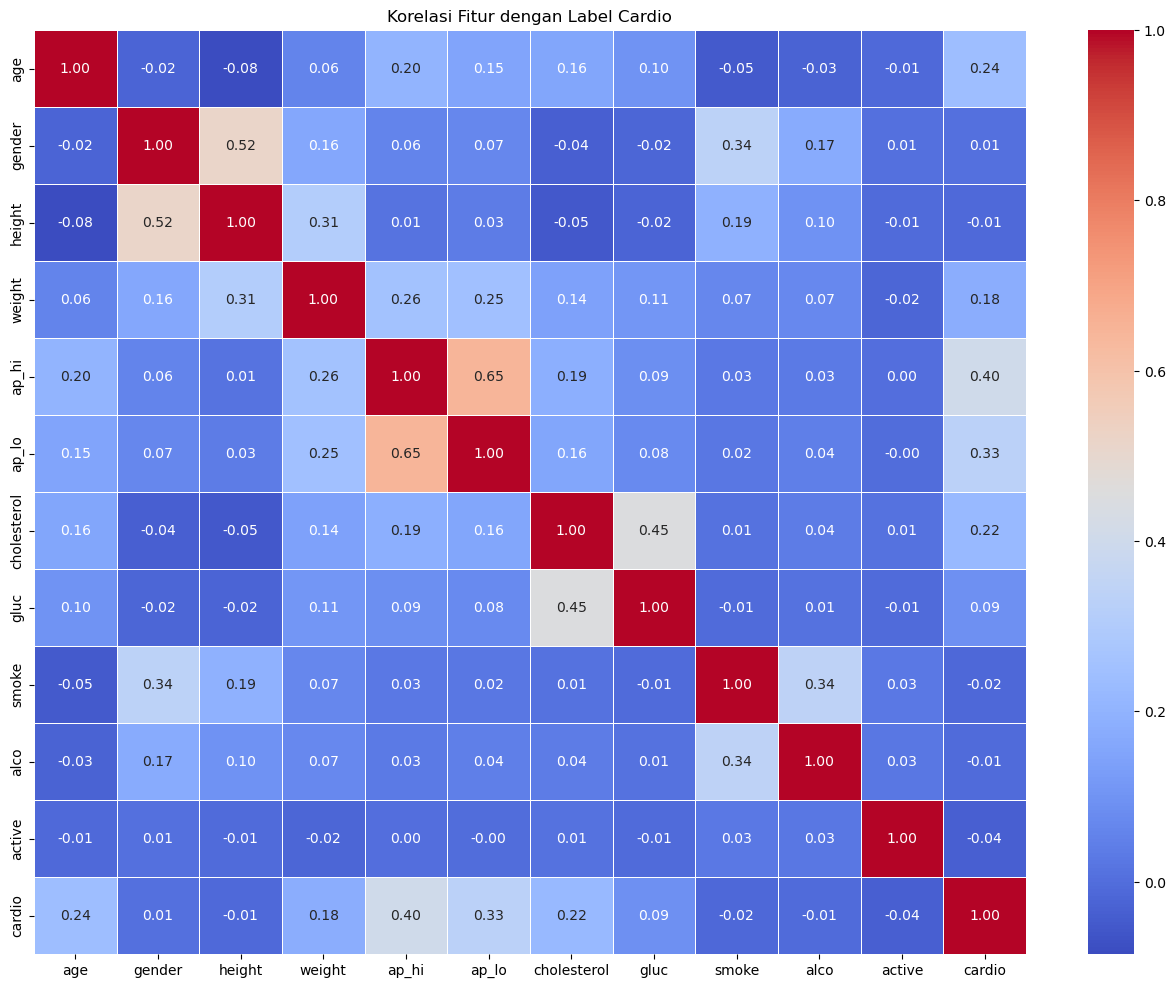

In [59]:
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Fitur dengan Label Cardio')
plt.show()

### Summary Heatmap
Heatmap di atas menyajikan visualisasi korelasi antara berbagai fitur (variabel prediktor) dengan label target "cardio" (penyakit kardiovaskular). Tujuannya adalah untuk memahami seberapa kuat hubungan линейная antara masing-masing fitur dengan risiko penyakit kardiovaskular. Warna pada heatmap menunjukkan tingkat korelasi, dengan warna merah интенсив menunjukkan korelasi positif yang kuat, warna biru menunjukkan korelasi negatif, dan warna putih menunjukkan korelasi yang lemah atau tidak signifikan.

*Analisis Korelasi*
- Fitur dengan korelasi positif tertinggi dengan "cardio" adalah ap_hi (tekanan darah sistolik) dan cholesterol. Ini mengindikasikan bahwa semakin tinggi tekanan darah sistolik dan kadar kolesterol, semakin tinggi risiko seseorang terkena penyakit kardiovaskular.
- Fitur lain yang juga berkorelasi positif meskipun tidak sekuat keduanya adalah age dan ap_lo (tekanan darah diastolik).
- Fitur-fitur seperti gender, height, weight, gluc (kadar gula darah), smoke (merokok), alco (konsumsi alkohol), dan active (aktivitas fisik) memiliki korelasi yang lemah dengan "cardio". Bahkan, beberapa di antaranya menunjukkan korelasi negatif yang sangat kecil.

Mengapa Membuang Fitur dengan Korelasi di Bawah 0.05?
- Fitur-fitur yang memiliki korelasi sangat lemah (di bawah 0.05) dengan label target dianggap kurang relevan atau tidak memberikan kontribusi signifikan dalam memprediksi risiko penyakit kardiovaskular. 

Dalam konteks pemodelan, fitur-fitur seperti ini dapat:
1. Meningkatkan kompleksitas model: Terlalu banyak fitur dapat membuat model menjadi rumit dan sulit diinterpretasikan.
2. Mengurangi kinerja model: Fitur-fitur yang tidak relevan dapat menimbulkan noise dan mengganggu kemampuan model untuk mempelajari pola yang sebenarnya.
3. Memboroskan sumber daya: Memproses dan menyimpan fitur-fitur yang tidak penting hanya akan membuang-buang sumber daya komputasi.

Oleh karena itu, sebagai bagian dari seleksi fitur, fitur-fitur dengan korelasi di bawah 0.05 akan dihilangkan. Tujuannya adalah untuk menyederhanakan model, meningkatkan kinerjanya, dan membuatnya lebih efisien.

# **Feature Selection**

In [60]:
data.drop(columns=['gender', 'height', 'smoke', 'alco', 'active'], inplace=True)

In [61]:
data

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,50.391781,62.0,110,80,1,1,0
1,55.419178,85.0,140,90,3,1,1
2,51.663014,64.0,130,70,3,1,1
3,48.282192,82.0,150,100,1,1,1
4,47.873973,56.0,100,60,1,1,0
...,...,...,...,...,...,...,...
69995,52.712329,76.0,120,80,1,1,0
69996,61.920548,126.0,140,90,2,2,1
69997,52.235616,105.0,180,90,3,1,1
69998,61.454795,72.0,135,80,1,2,1


Fitur-fitur seperti gender, height, smoke, alco, dan active memiliki korelasi yang sangat rendah (mendekati 0) dengan label target cardio. Artinya, fitur-fitur ini tidak memberikan kontribusi signifikan dalam memprediksi risiko penyakit kardiovaskular sehingga di drop.

# **Standarization**

In [62]:
data.describe(include='all')

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
count,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000
mean,53.325608,74.060761,126.256878,81.323785,1.364182,1.225836,0.494625
std,6.761746,14.128736,17.508785,9.746091,0.678573,0.571800,0.499975
min,29.583562,30.000000,7.000000,1.000000,1.000000,1.000000,0.000000
25%,48.375342,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,53.972603,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,58.419178,82.000000,140.000000,90.000000,1.000000,1.000000,1.000000
max,64.967123,160.000000,200.000000,190.000000,3.000000,3.000000,1.000000


0:	learn: 0.6657596	total: 12.2ms	remaining: 12.2s
200:	learn: 0.5319445	total: 1.61s	remaining: 6.39s
400:	learn: 0.5232423	total: 3.19s	remaining: 4.76s
600:	learn: 0.5160151	total: 4.77s	remaining: 3.17s
800:	learn: 0.5096292	total: 6.37s	remaining: 1.58s
999:	learn: 0.5039879	total: 7.93s	remaining: 0us


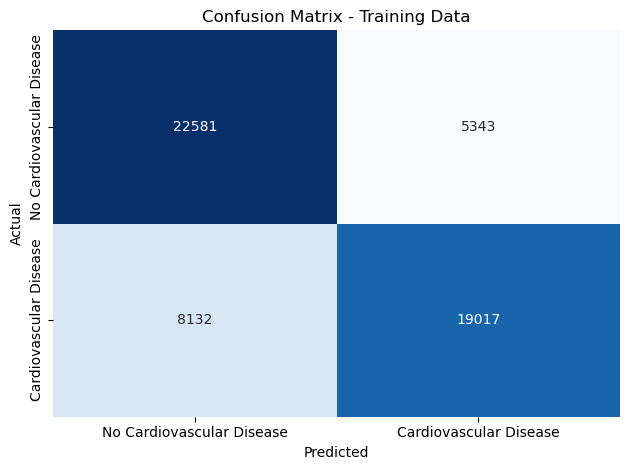


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     27924
           1       0.78      0.70      0.74     27149

    accuracy                           0.76     55073
   macro avg       0.76      0.75      0.75     55073
weighted avg       0.76      0.76      0.75     55073



In [ ]:
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=200)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = catboost_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))


In [63]:
scaler = StandardScaler()

data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

data.describe(include='all')

C:\Users\kvint\AppData\Local\Temp\ipykernel_23448\1260091294.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.92850512  0.78493294  0.21378692 ...  3.06951703  0.49935993
 -0.3573591 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\kvint\AppData\Local\Temp\ipykernel_23448\1260091294.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.13582826  0.89023162 -1.16188813 ...  0.89023162 -0.13582826
 -0.13582826]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\kvint\AppData\Local\Temp\ipykernel_23448\1260091294.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
count,6.884200e+04,6.884200e+04,6.884200e+04,6.884200e+04,6.884200e+04,6.884200e+04,68842.000000
mean,-3.906633e-17,6.993750e-16,-3.979915e-16,-3.979915e-16,-1.529625e-16,-8.711224e-17,0.494625
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.499975
min,-3.511255e+00,-3.118544e+00,-6.811309e+00,-8.241701e+00,-5.366917e-01,-3.949591e-01,0.000000
25%,-7.321039e-01,-6.413049e-01,-3.573591e-01,-1.358283e-01,-5.366917e-01,-3.949591e-01,0.000000
50%,9.568533e-02,-1.458571e-01,-3.573591e-01,-1.358283e-01,-5.366917e-01,-3.949591e-01,0.000000
75%,7.532976e-01,5.619255e-01,7.849329e-01,8.902316e-01,-5.366917e-01,-3.949591e-01,1.000000
max,1.721685e+00,6.082629e+00,4.211809e+00,1.115083e+01,2.410692e+00,3.102793e+00,1.000000


Pada tahap preprocessing ini, skala data disesuaikan agar data dapat diproses secara optimal. Penyesuaian skala data tersebut dapat dilakukan dengan dua teknik, yaitu standarisasi dan normalisasi. Keduanya bertujuan untuk meningkatkan performa model dengan menangani perbedaan skala antar fitur. Pada beberapa model, penyesuaian skala data berperan penting dalam memberikan hasil prediksi yang akurat.

Berdasarkan analisis data, kami memilih untuk menyesuaikan data dengan standarisasi daripada normalisasi.

**Mengapa Standarisasi lebih baik daripada Normalisasi?**

Pada analisis outliers, terlihat bahwa ada banyak data yang terdeteksi sebagai outliers. Meskipun terdeteksi sebagai outliers, data tersebut mungkin saja memiliki informasi penting, sehingga data outliers yang masih masuk akal akan tetap digunakan. Oleh karena itu, teknik standarisasi merupakan opsi yang lebih tepat karena penyesuaian data akan dilakukan berdasarkan distribusi dengan mean = 0 dan standar deviasi = 1 tanpa membatasi data dalam rentang tertentu, sehingga dampak dari nilai ekstrem dapat berkurang tanpa kehilangan informasi penting, serta distribusi data dapat tetap seimbang.
Beberapa model machine learning yang digunakan dalam project ini, seperti Support Vector Classifier dan K-Nearest Neighbours, merupakan model yang sensitive terhadap jarak. Selain itu, model Logistic Regression juga merupakan model yang bergantung pada variansi atau distribusi data. Hal ini berarti algoritma model-model tersebut sensitive terhadap varians data, sehingga skala yang berbeda dapat menyebabkan dominasi fitur tertentu. Oleh karena itu, standarisasi diperlukan untuk mengatasi masalah ini agar dapat memastikan bahwa tidak ada fitur yang lebih dominan hanya karena skalanya lebih besar.

Normalisasi kurang sesuai digunakan pada project ini karena Teknik tersebut rentan terhadap outlier, sehingga banyaknya outlier yang terdeteksi pada data ini akan menyebabkan distorsi skala. Selain itu, normalisasi kurang cocok digunakan pada model yang bergantung pada jarak, varians, atau distribusi data. Jadi, standarisasi merupakan solusi terbaik dalam project ini karena lebih tahan dan stabil terhadap outliers, serta lebih sesuai dengan model yang digunakan.

# **Data Splitting**

In [64]:
X = data.drop('cardio', axis=1)
y = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Data Shape: (55073, 6)
Training Target Shape: (55073,)
Testing Data Shape: (13769, 6)
Testing Target Shape: (13769,)


Rasio 80:20 adalah salah satu pembagian yang umum digunakan dalam data splitting. 80% data digunakan untuk training, sehingga model memiliki cukup data untuk mempelajari pola dengan baik. 20% data digunakan untuk testing, yang masih cukup untuk memberikan evaluasi yang akurat tentang performa model.

Ketika membagi data, kami ingin memastikan bahwa distribusi fitur dan target dalam training set dan testing set serupa sehingga menggunakan shape. Jika distribusi data tidak sama, maka bisa menyebabkan model overfitting  (terlalu fokus pada kelas mayoritas) atau underfitting (tidak belajar dengan baik).

# **Modelling**

## Model 1: Logistic Regression

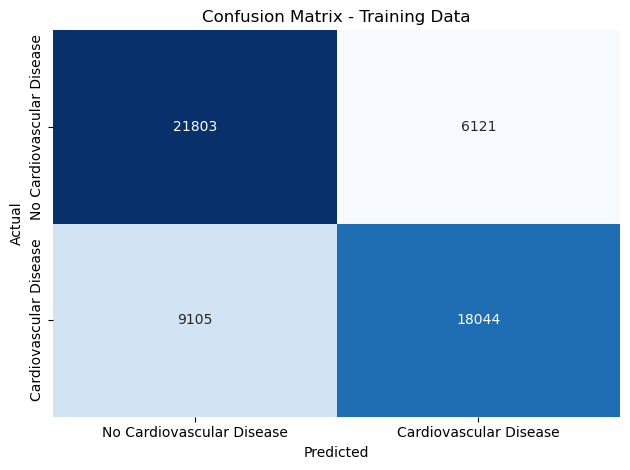


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27924
           1       0.75      0.66      0.70     27149

    accuracy                           0.72     55073
   macro avg       0.73      0.72      0.72     55073
weighted avg       0.73      0.72      0.72     55073



In [65]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = lr_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Training Data Confusion Matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')

# Display the plots
plt.tight_layout()
plt.show()

# Optional: Print the Classification Report for both training and test data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

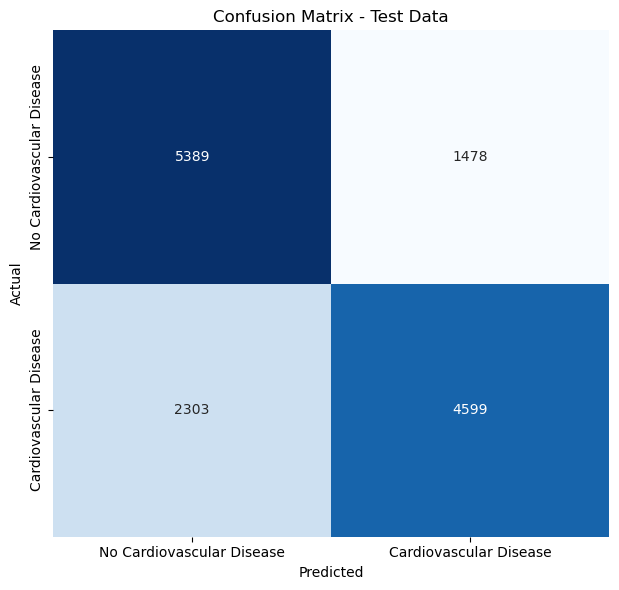


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6867
           1       0.76      0.67      0.71      6902

    accuracy                           0.73     13769
   macro avg       0.73      0.73      0.72     13769
weighted avg       0.73      0.73      0.72     13769



In [66]:
# Generate Confusion Matrix for Test Data
y_test_pred = lr_model.predict(X_test)   # Predictions on test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

# Test Data Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')

# Display the plots
plt.tight_layout()
plt.show()

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.71 - Dari semua data training yang diprediksi sebagai kelas 0, 71% memang benar kelas 0.
    - Recall: 0.78 - Dari semua data training yang sebenarnya kelas 0, model berhasil memprediksi 78% dengan benar.
    - F1-score: 0.74 - Keseimbangan antara presisi dan recall untuk kelas 0 adalah 0.74.
    - Support: 27924 - Terdapat 27924 data training yang sebenarnya kelas 0.
2. Kelas 1:
    - Presisi: 0.75 - Dari semua data training yang diprediksi sebagai kelas 1, 75% memang benar kelas 1.
    - Recall: 0.66 - Dari semua data training yang sebenarnya kelas 1, model berhasil memprediksi 66% dengan benar.
    - F1-score: 0.70 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 0.70.
    - Support: 27149 - Terdapat 27149 data training yang sebenarnya kelas 1.
3. Akurasi (Accuracy): 0.72 - Secara keseluruhan, model berhasil memprediksi 72% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Interpretasi untuk data testing **serupa dengan data training**. Namun,hasil pada data testing ini umumnya lebih penting karena menunjukkan bagaimana model akan bekerja pada data baru yang belum pernah dilihat sebelumnya.
2. Secara umum, performa model pada data testing (0.73 akurasi) mirip dengan data training (0.72 akurasi). Hal ini menunjukkan bahwa model tidak overfit secara signifikan. Overfitting terjadi ketika model terlalu baik pada data training tetapi buruk pada data testing.

**Kesimpulan Model Logistic Regression:**
1. Model cukup baik dengan akurasi 72-73% dan keseimbangan antara precision dan recall.
2. Model lebih baik dalam mengenali orang sehat (recall 78%) dibandingkan mengenali orang sakit (recall 66-67%).
3. Model tidak mengalami overfitting yang signifikan.

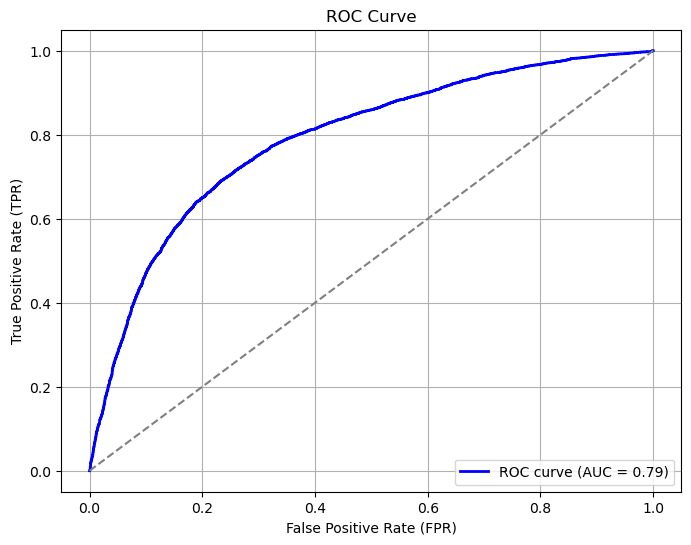

In [67]:
y_test_prob = lr_model.predict_proba(X_test)[:, 1]  # Only probabilities for the positive class

# Compute the ROC curve values (FPR, TPR, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (chance level)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Dengan ROC Curve ini, dapat diketahui bahwa model logistic regression memiliki kemampuan klasifikasi yang **cukup baik** dengan AUC = 0.79. Artinya, 79% dari waktu, model akan membedakan positif dan negatif dengan benar.

Kurva ini juga tidak terlalu dekat dengan pojok kiri atas (yang merupakan kinerja sempurna), namun juga tidak terlalu dekat dengan garis diagonal. Ini mengindikasikan bahwa model memiliki kinerja yang baik. 

## Model 2: KNN

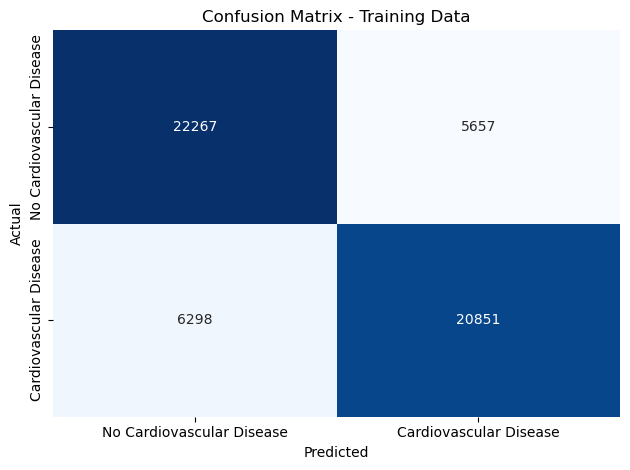


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     27924
           1       0.79      0.77      0.78     27149

    accuracy                           0.78     55073
   macro avg       0.78      0.78      0.78     55073
weighted avg       0.78      0.78      0.78     55073



In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors based on your dataset

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = knn_model.predict(X_train)  # Predictions on training data
y_test_pred = knn_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')

# Display the plots
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

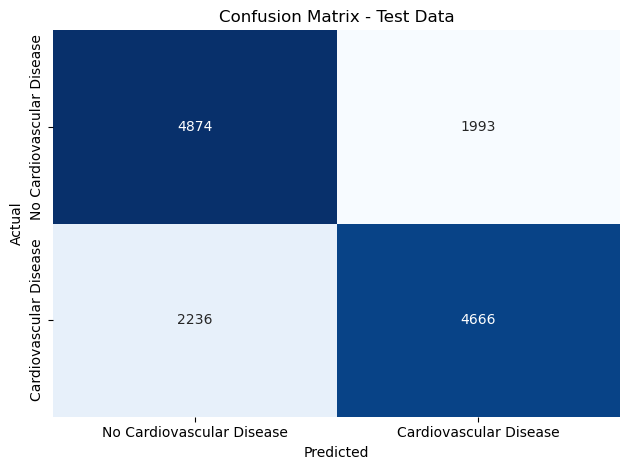


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6867
           1       0.70      0.68      0.69      6902

    accuracy                           0.69     13769
   macro avg       0.69      0.69      0.69     13769
weighted avg       0.69      0.69      0.69     13769



In [69]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')

# Display the plots
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0: 
    - Presisi (Precision): 0.78 - Dari semua data training yang diprediksi sebagai kelas 0, 78% di antaranya memang benar kelas 0.
    - Recall: 0.80 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 80% dengan benar.
    - F1-score: 0.79 - Rata-rata harmonik antara presisi dan recall, mengukur keseimbangan keduanya. Nilai 0.79 menunjukkan keseimbangan yang cukup baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.79 - Dari semua data training yang diprediksi sebagai kelas 1, 79% di antaranya memang benar kelas 1.
    - Recall: 0.77 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 77% dengan benar.
    - F1-score: 0.78 - Keseimbangan antara presisi dan recall untuk kelas 1 cukup baik.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.

3. Akurasi (Accuracy): 0.78 - Secara keseluruhan, model berhasil memprediksi 78% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.69 - Dari semua data testing yang diprediksi sebagai kelas 0, 69% di antaranya memang benar kelas 0.
    - Recall: 0.71 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 71% dengan benar.
    - F1-score: 0.70 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.70 - Dari semua data testing yang diprediksi sebagai kelas 1, 70% di antaranya memang benar kelas 1.
    - Recall: 0.68 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 68% dengan benar.
    - F1-score: 0.69 - Keseimbangan antara presisi dan recall untuk kelas 1 pada data testing.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.69 - Secara keseluruhan, model berhasil memprediksi 69% data testing dengan benar.

**Kesimpulan Model KNN:**
- Terjadi penurunan performa dari data training ke data testing. Akurasi menurun dari 78% menjadi 69%.
- Penurunan ini mengindikasikan adanya potensi overfitting. Model terlalu baik dalam mempelajari data training, sehingga kurang mampu menggeneralisasi pada data baru.


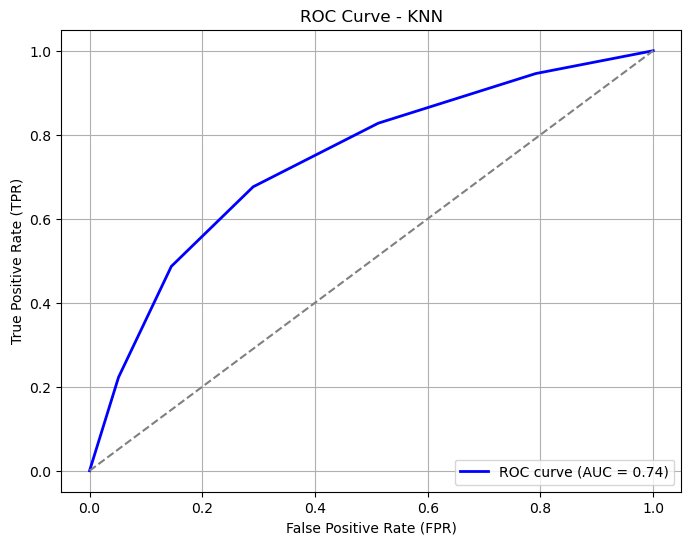

AUC Score: 0.74


In [70]:
y_test_prob = knn_model.predict_proba(X_test)[:, 1]  # Only probabilities for the positive class

# Compute the ROC curve values (FPR, TPR, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (chance level)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, print the AUC value
print(f"AUC Score: {roc_auc:.2f}")

Model KNN ini menunjukkan kinerja yang **cukup baik** dalam membedakan antara kelas 0 dan 1, dapat dilihat dengan ROC curve di atas dengan nilai AUC 0.74.

Lalu, kurva ROC pada grafik menunjukkan bahwa model KNN memiliki kinerja yang lebih baik daripada model acak, terutama pada nilai FPR (False Positive Rate) yang rendah.

## Model 3: SVM

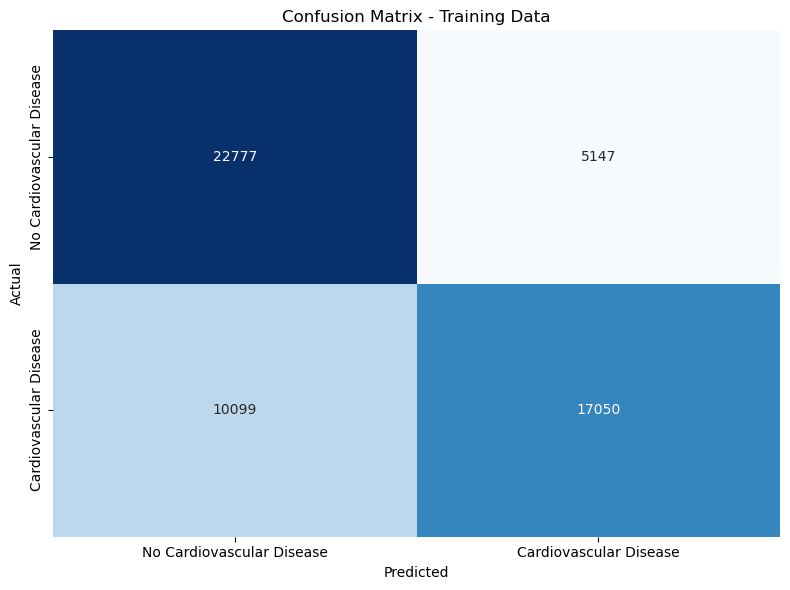


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     27924
           1       0.77      0.63      0.69     27149

    accuracy                           0.72     55073
   macro avg       0.73      0.72      0.72     55073
weighted avg       0.73      0.72      0.72     55073



In [71]:
svm_model = SVC(kernel='linear', probability=True)  # probability=True allows predict_proba()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = svm_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

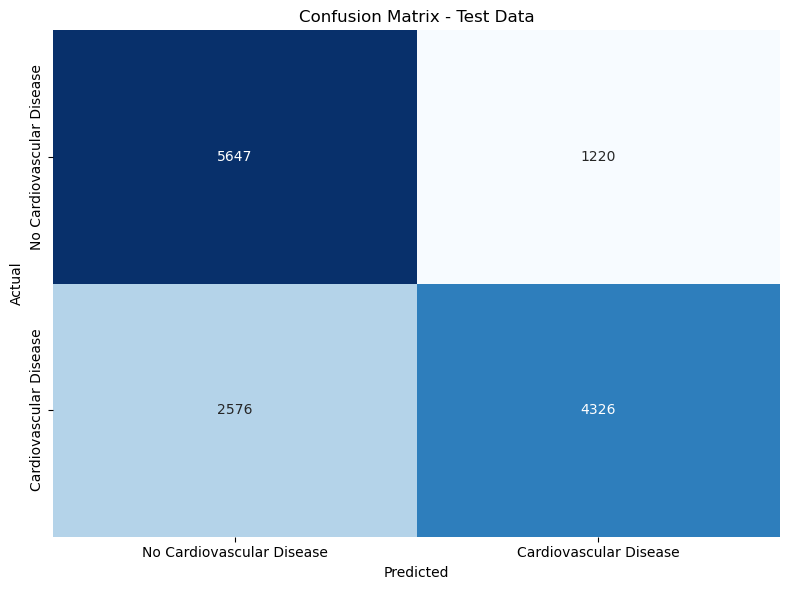


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6867
           1       0.78      0.63      0.70      6902

    accuracy                           0.72     13769
   macro avg       0.73      0.72      0.72     13769
weighted avg       0.73      0.72      0.72     13769



In [72]:
y_test_pred = svm_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi (Precision): 0.69 - Dari semua data training yang diprediksi sebagai kelas 0, 69% di antaranya memang benar kelas 0.
    -nRecall: 0.82 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 82% dengan benar.
    - F1-score: 0.75 - Rata-rata harmonik antara presisi dan recall untuk kelas 0. Menunjukkan keseimbangan yang cukup baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.77 - Dari semua data training yang diprediksi sebagai kelas 1, 77% di antaranya memang benar kelas 1.
    - Recall: 0.63 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 63% dengan benar.
    - F1-score: 0.69 - Rata-rata harmonik antara presisi dan recall untuk kelas 1.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi (Accuracy): 0.72 - Secara keseluruhan, model berhasil memprediksi 72% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.69 - Dari semua data testing yang diprediksi sebagai kelas 0, 69% di antaranya memang benar kelas 0.
    - Recall: 0.82 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 82% dengan benar.
    - F1-score: 0.75 - Rata-rata harmonik antara presisi dan recall untuk kelas 0 pada data testing.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.78 - Dari semua data testing yang diprediksi sebagai kelas 1, 78% di antaranya memang benar kelas 1.
    - Recall: 0.63 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 63% dengan benar.
    - F1-score: 0.70 - Rata-rata harmonik antara presisi dan recall untuk kelas 1 pada data testing.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.72 - Secara keseluruhan, model berhasil memprediksi 72% data testing dengan benar.

**Kesimpulan Model SVM:**
1. Model SVM dengan kernel linear menunjukkan performa yang cukup baik dengan akurasi 72% baik pada data training maupun testing.
2. Tidak ada indikasi overfitting, yang berarti model mampu menggeneralisasi dengan baik.
3. Model ini memiliki trade-off antara presisi dan recall. Untuk kelas 0, recall lebih tinggi daripada presisi, dan sebaliknya untuk kelas 1. 
4. Catatan Penting: Proses training model SVM dengan kernel linear ini memakan waktu yang cukup lama. Hal ini disebabkan oleh ukuran data yang besar, meskipun data telah distandarisasi. SVM dengan kernel linear, meskipun relatif cepat dibandingkan kernel lainnya, masih memiliki kompleksitas komputasi yang tinggi, terutama dengan data berdimensi tinggi atau jumlah sampel yang besar.


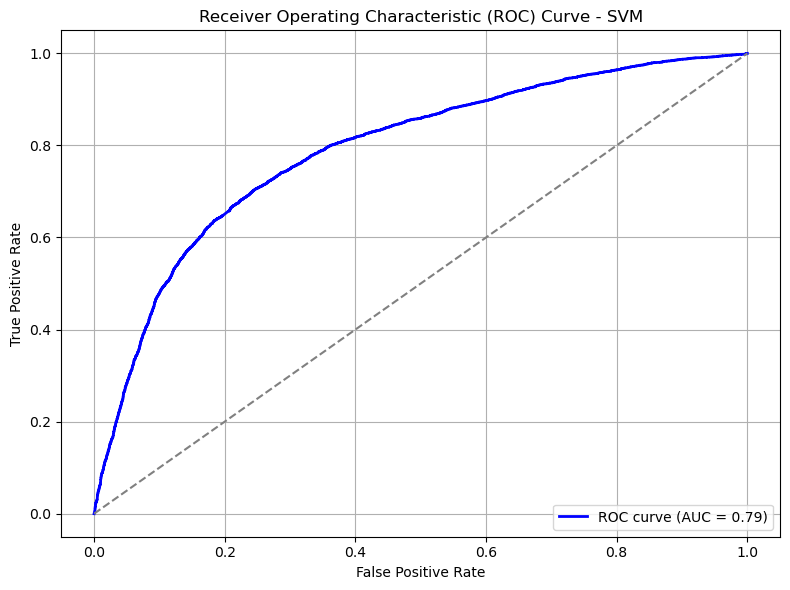

AUC: 0.79


In [73]:
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Berdasarkan kurva ROC dan nilai AUC 0.79, dapat disimpulkan bahwa model SVM ini memiliki kinerja yang cukup baik dalam memisahkan kelas 0 dan 1.  Meskipun tidak sempurna, model ini menunjukkan kemampuan yang solid dalam mengklasifikasikan data.

Kurva ini tidak terlalu dekat dengan pojok kiri atas (yang merupakan kinerja sempurna), namun juga tidak terlalu dekat dengan garis diagonal. Hal tersebut mengindikasikan bahwa model memiliki kinerja yang baik. 

## Model 4: Decision Tree

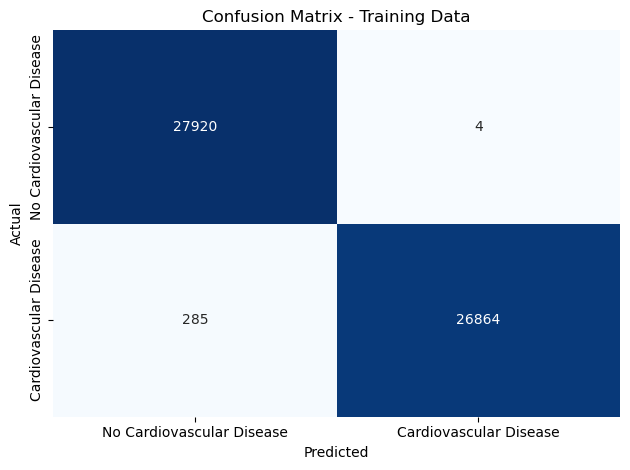


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27924
           1       1.00      0.99      0.99     27149

    accuracy                           0.99     55073
   macro avg       0.99      0.99      0.99     55073
weighted avg       0.99      0.99      0.99     55073



In [74]:
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = dt_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

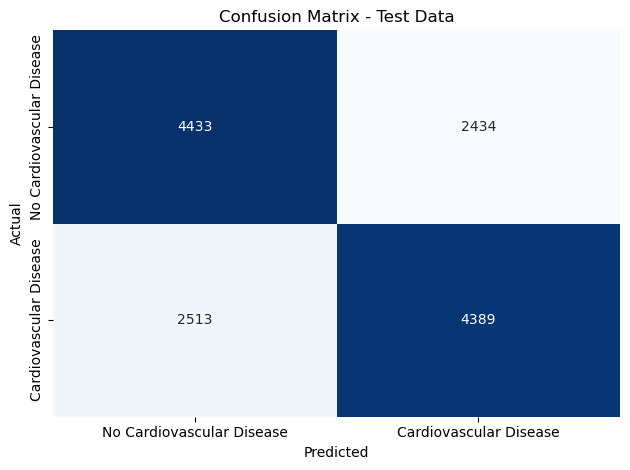


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6867
           1       0.64      0.64      0.64      6902

    accuracy                           0.64     13769
   macro avg       0.64      0.64      0.64     13769
weighted avg       0.64      0.64      0.64     13769



In [75]:
y_test_pred = dt_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.99 - Dari semua data training yang diprediksi sebagai kelas 0, 99% di antaranya memang benar kelas 0.
    - Recall: 1.00 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 100% dengan benar.
    - F1-score: 0.99 - Keseimbangan antara presisi dan recall untuk kelas 0 sangat baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 1.00 - Dari semua data training yang diprediksi sebagai kelas 1, 100% di antaranya memang benar kelas 1.
    - Recall: 0.99 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 99% dengan benar.
    - F1-score: 0.99 - Keseimbangan antara presisi dan recall untuk kelas 1 sangat baik.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.99 - Secara keseluruhan, model berhasil memprediksi 99% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.64 - Dari semua data testing yang diprediksi sebagai kelas 0, 64% di antaranya memang benar kelas 0.
    - Recall: 0.65 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 65% dengan benar.
    - F1-score: 0.64 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.64 - Dari semua data testing yang diprediksi sebagai kelas 1, 64% di antaranya memang benar kelas 1.
    - Recall: 0.64 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 64% dengan benar.
    - F1-score: 0.64 - Keseimbangan antara presisi dan recall untuk kelas 1 pada data testing.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.64 - Secara keseluruhan, model berhasil memprediksi 64% data testing dengan benar.


**Kesimpulan Model Decision Tree:**

Terjadi penurunan performa yang sangat signifikan dari data training ke data testing. Akurasi menurun dari 99% menjadi 64%. Hal tersebut adalah indikasi kuat bahwa model mengalami overfitting yang sangat parah. Model terlalu baik dalam mempelajari data training, sehingga gagal menggeneralisasi pada data baru.

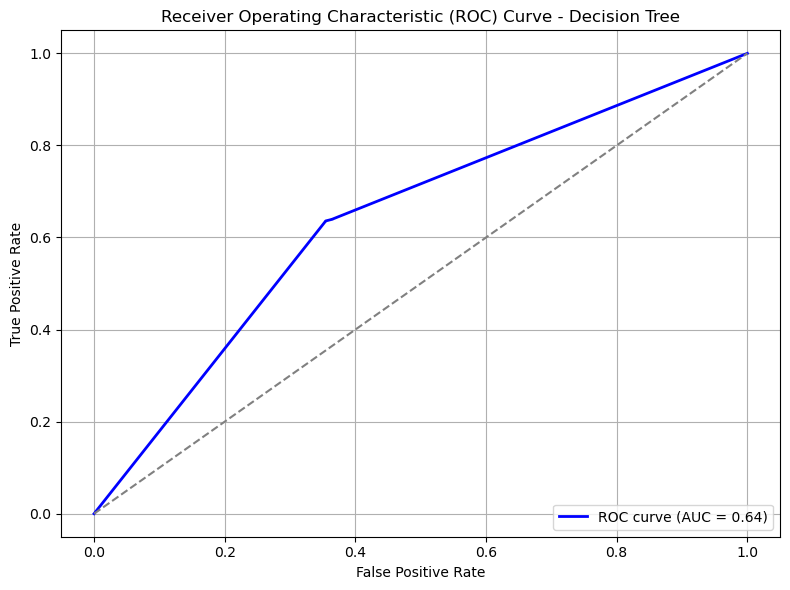

AUC: 0.64


In [76]:
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Berdasarkan kurva ROC dan nilai AUC 0.64, dapat disimpulkan bahwa model Decision Tree ini memiliki kinerja yang buruk dalam memisahkan kelas 0 dan 1.  Model ini jauh dari kata ideal dan mengindikasikan masalah overfitting yang signifikan.

Melalui analisis visual kurva ROC, terlihat bahwa kurva ini jauh dari pojok kiri atas (yang merupakan kinerja sempurna), dan cenderung mendekati garis diagonal. Ini mengindikasikan bahwa model memiliki kinerja yang buruk dalam memisahkan kelas.

## Model 5: Random Forest

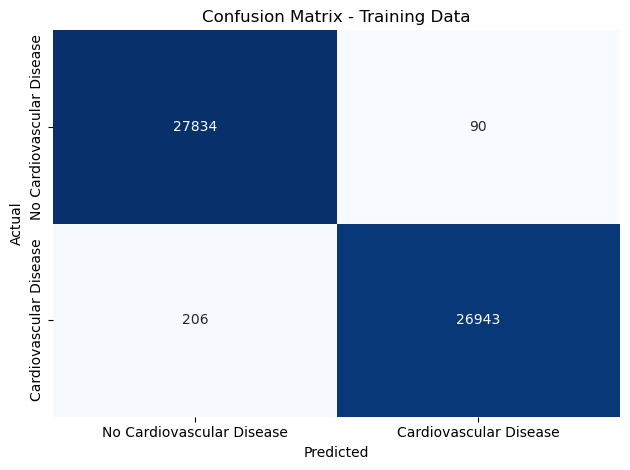


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27924
           1       1.00      0.99      0.99     27149

    accuracy                           0.99     55073
   macro avg       0.99      0.99      0.99     55073
weighted avg       0.99      0.99      0.99     55073



In [77]:
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = rf_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

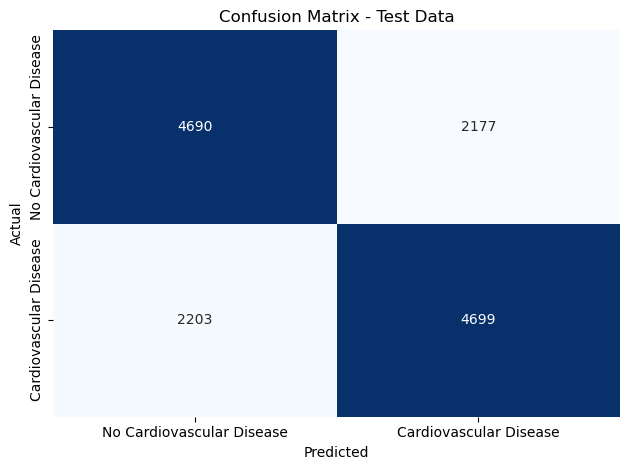


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      6867
           1       0.68      0.68      0.68      6902

    accuracy                           0.68     13769
   macro avg       0.68      0.68      0.68     13769
weighted avg       0.68      0.68      0.68     13769



In [78]:
y_test_pred = rf_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.99 - Dari semua data training yang diprediksi sebagai kelas 0, 99% di antaranya memang benar kelas 0.
    - Recall: 1.00 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 100% dengan benar.
    - F1-score: 0.99 - Keseimbangan antara presisi dan recall untuk kelas 0 sangat baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 1.00 - Dari semua data training yang diprediksi sebagai kelas 1, 100% di antaranya memang benar kelas 1.
    - Recall: 0.99 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 99% dengan benar.
    - F1-score: 0.99 - Keseimbangan antara presisi dan recall untuk kelas 1 sangat baik.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.99 - Secara keseluruhan, model berhasil memprediksi 99% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.68 - Dari semua data testing yang diprediksi sebagai kelas 0, 68% di antaranya memang benar kelas 0.
    - Recall: 0.68 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 68% dengan benar.
    - F1-score: 0.68 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.68 - Dari semua data testing yang diprediksi sebagai kelas 1, 68% di antaranya memang benar kelas 1.
    - Recall: 0.68 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 68% dengan benar.
    - F1-score: 0.68 - Keseimbangan antara presisi dan recall untuk kelas 1 pada data testing.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.68 - Secara keseluruhan, model berhasil memprediksi 68% data testing dengan benar.

**Kesimpulan Model Random Forest:**

Terjadi *overfitting* pada model ini. Sama dengan model sebelumnya, yaitu decision tree yang mengalami overfitting. Pada model ini, terjadi penurunan performa yang signifikan dari data training ke data testing. Akurasi menurun dari 99% menjadi 68%. Model terlalu baik dalam mempelajari data training, sehingga gagal menggeneralisasi pada data baru.

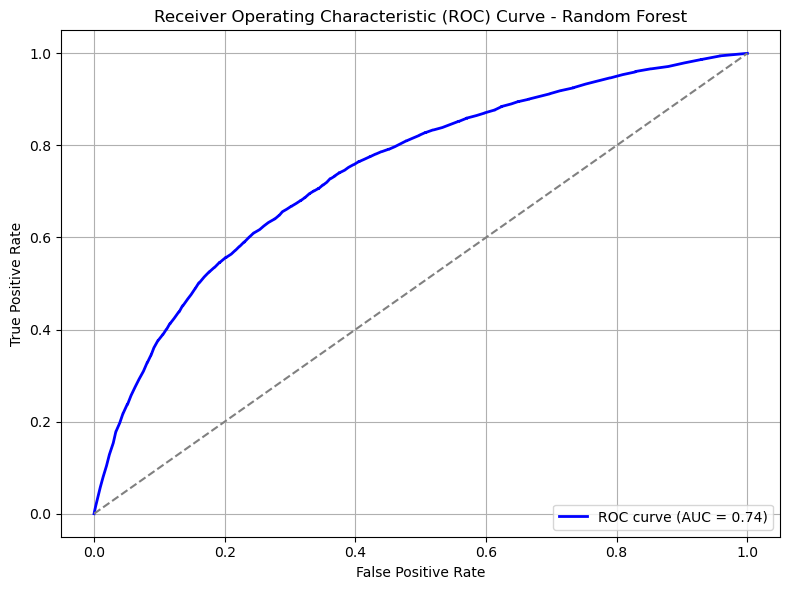

AUC: 0.74


In [79]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Nilai AUC sebesar 0.74 menunjukkan bahwa model Random Forest ini memiliki kemampuan yang cukup baik dalam memisahkan kelas 0 dan 1. Kurva ROC juga mengindikasikan bahwa model memiliki kinerja yang baik, dapat dilihat dari kurva yang tidak terlalu dekat dengan pojok kiri atas namun tidak terlalu dekat juga dengan garis diagonal. 

Meskipun overfit, model mungkin masih menangkap beberapa pola umum yang berguna dari data training. Pola ini cukup untuk memberikan kurva ROC yang lumayan, karena model masih bisa memprediksi peringkat yang benar.

## Model 6: XGBoost

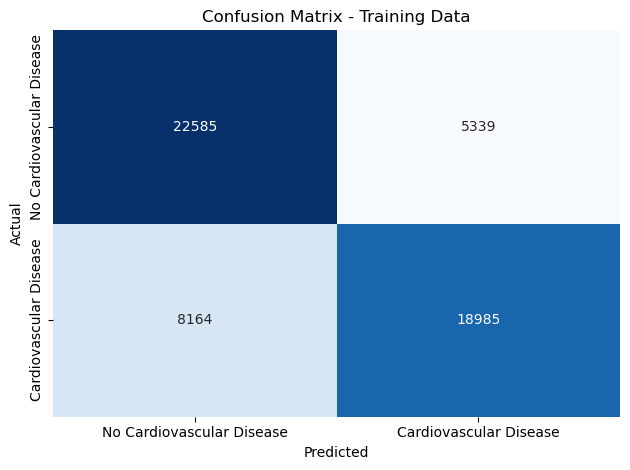


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     27924
           1       0.78      0.70      0.74     27149

    accuracy                           0.75     55073
   macro avg       0.76      0.75      0.75     55073
weighted avg       0.76      0.75      0.75     55073



In [80]:
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = xgb_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))


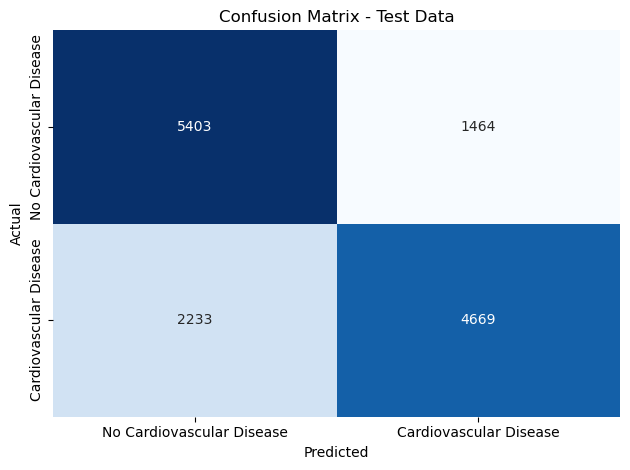


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6867
           1       0.76      0.68      0.72      6902

    accuracy                           0.73     13769
   macro avg       0.73      0.73      0.73     13769
weighted avg       0.73      0.73      0.73     13769



In [81]:
y_test_pred = xgb_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.73 - Dari semua data training yang diprediksi sebagai kelas 0, 73% di antaranya memang benar kelas 0.
    - Recall: 0.81 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 81% dengan benar.
    - F1-score: 0.77 - Keseimbangan antara presisi dan recall cukup baik, yang berarti model cenderung mengenali kelas 0 dengan baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.78 - Dari semua data training yang diprediksi sebagai kelas 1, 78% di antaranya memang benar kelas 1.
    - Recall: 0.70 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 70% dengan benar.
    - F1-score: 0.74 - Keseimbangan antara presisi dan recall untuk kelas 1 cukup baik, namun model lebih sulit mengenali kelas 1 dibandingkan kelas 0.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.75 - Secara keseluruhan, model berhasil memprediksi 75% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.71 - Dari semua data testing yang diprediksi sebagai kelas 0, 71% di antaranya memang benar kelas 0.
    - Recall: 0.79 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 79% dengan benar.
    - F1-score: 0.75 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing sudah cukup baik.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.76 - Dari semua data testing yang diprediksi sebagai kelas 1, 76% di antaranya memang benar kelas 1.
    - Recall: 0.68 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 68% dengan benar.
    - F1-score: 0.72 - Keseimbangan antara presisi dan recall untuk kelas 1 pada data testing sudah cukup baik.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.73 - Secara keseluruhan, model berhasil memprediksi 73% data testing dengan benar.

**Kesimpulan Model XGBoost:**

- Terjadi penurunan akurasi dari 75% (training) ke 73% (testing). Penurunan yang tidak terlalu signifikan tersebut menunjukkan bahwa model tidak terlalu mengalami overfitting. 
- Berdasarkan nilai recall kedua kelas, model lebih efektif dalam mengenali kelas 0 dibanding kelas 1.
- Model sudah cukup baik, tetapi dapat ditingkatkan agar dapat mengenali kedua kelas dengan lebih seimbang.

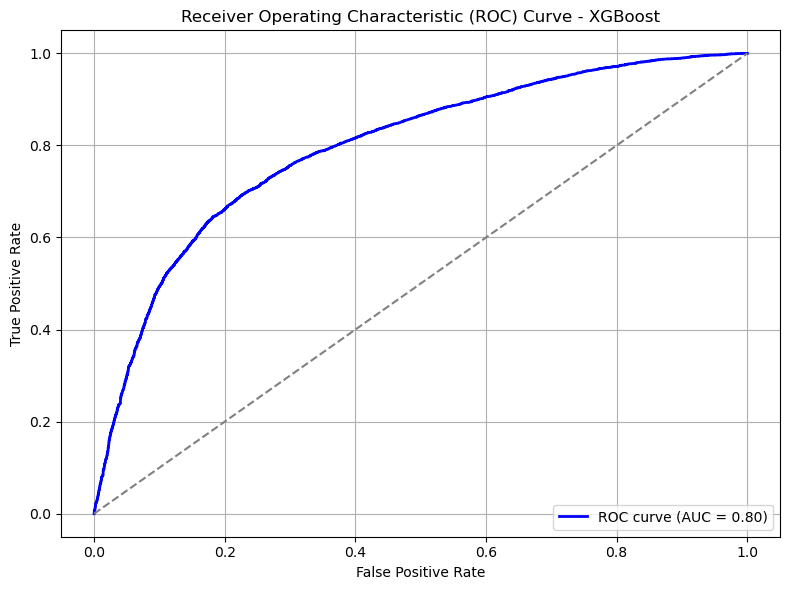

AUC: 0.80


In [82]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Nilai AUC yang mencapai 0.80 menunjukkan bahwa model ini memiliki kemampuan klasifikasi yang cukup baik. Model XGBoost ini dapat membedakan kelas positif dan negatif dengan akurasi 80%.

Kurva ROC yang jauh di atas garis diagonal juga menunjukkan bawha model memiliki kinerja yang lebih baik dari tebakan acak. Secara keseluruhan, berdasarkan kurva ROC tersebut, model XGBoost dapat digunakan untuk klasifikasi dengan akurasi yang cukup tinggi.

## Model 7: Naive Bayes

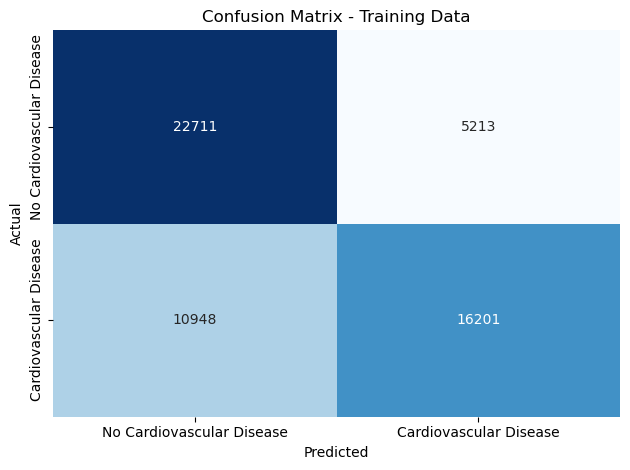


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     27924
           1       0.76      0.60      0.67     27149

    accuracy                           0.71     55073
   macro avg       0.72      0.71      0.70     55073
weighted avg       0.72      0.71      0.70     55073



In [83]:
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = nb_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()


# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))


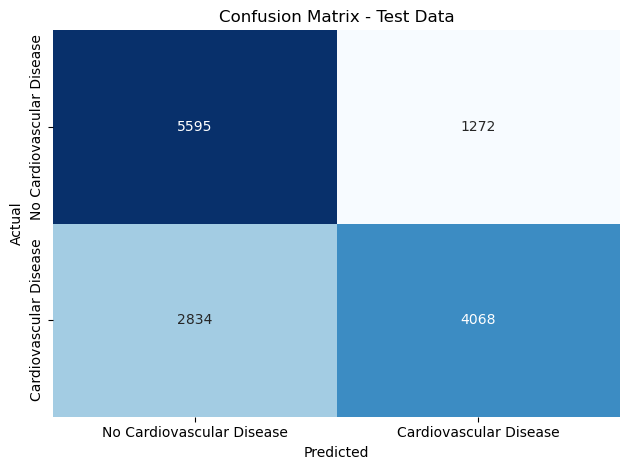


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      6867
           1       0.76      0.59      0.66      6902

    accuracy                           0.70     13769
   macro avg       0.71      0.70      0.70     13769
weighted avg       0.71      0.70      0.70     13769



In [84]:
y_test_pred = nb_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.67 - Dari semua data training yang diprediksi sebagai kelas 0, 67% di antaranya memang benar kelas 0.
    - Recall: 0.81 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 81% dengan benar.
    - F1-score: 0.74 - Keseimbangan antara presisi dan recall cukup baik, yang berarti model cenderung mengenali kelas 0 dengan cukup baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.76 - Dari semua data training yang diprediksi sebagai kelas 1, 76% di antaranya memang benar kelas 1.
    - Recall: 0.60 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 60% dengan benar.
    - F1-score: 0.67 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 0.67, yang berarti model kesulitan dalam mengenali semua data kelas 1.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.71 - Secara keseluruhan, model berhasil memprediksi 71% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.66 - Dari semua data testing yang diprediksi sebagai kelas 0, 66% di antaranya memang benar kelas 0.
    - Recall: 0.81 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 81% dengan benar.
    - F1-score: 0.73 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing sudah cukup baik.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.76 - Dari semua data testing yang diprediksi sebagai kelas 1, 76% di antaranya memang benar kelas 1.
    - Recall: 0.59 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 59% dengan benar.
    - F1-score: 0.66 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 66%, yang berarti model tetap sulit mengenali data kelas 1.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.70 - Secara keseluruhan, model berhasil memprediksi 70% data testing dengan benar.

**Kesimpulan Model Naive Bayes:**

- Akurasi yang cenderung stabil menunjukkan bahwa model tidak mengalami overfitting.
- Perbedaan yang signifikan pada recall antara kedua kelas menunjukkan bahwa model lebih efektif dalam mengenali kelas 0 dibandingkan kelas 1.
- Model sering mengklasifikasikan kelas 1 sebagai kelas 0 (kesalahan klasifikasi).

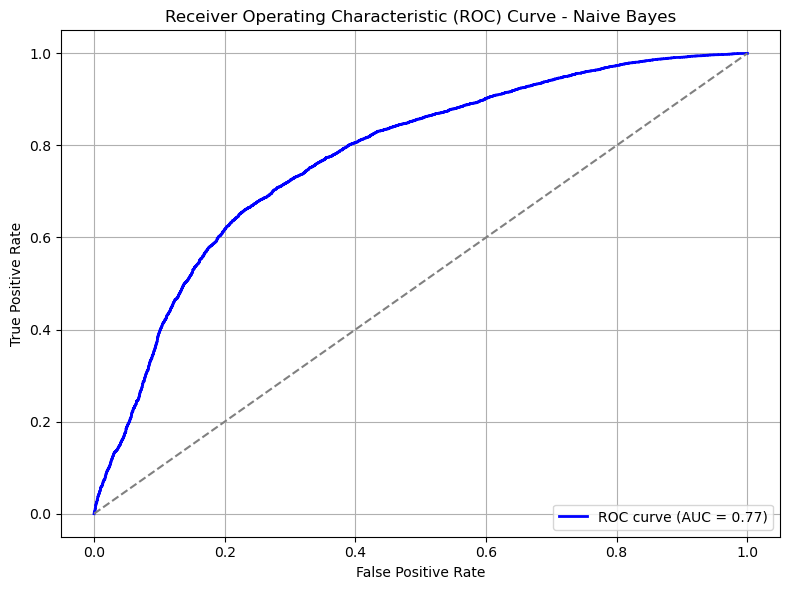

AUC: 0.77


In [85]:
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Nilai AUC sebesar 0.77 menunjukkan bahwa model dapat membedakan kelas positif dan negatif dengan akurasi 77%. Performa model Naive Bayes ini sedikit lebih rendah dari model sebelumnya (XGBoost), tetapi model ini dapat menjadi alternatif jika mengutamakan kecepatan.

Perbandingan kurva ROC dengan garis diagonalnya menunjukkan bahwa model memiliki performa yang lebih baik daripada tebakan acak, tetapi masih belum optimal.

## Model 8: AdaBoost

c:\Users\kvint\miniconda3\envs\py312\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


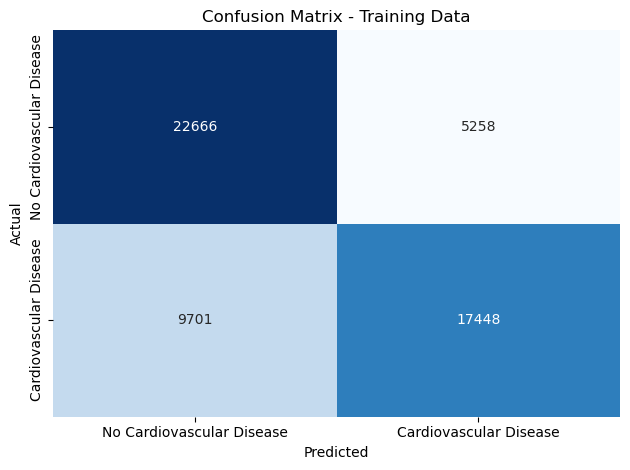


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     27924
           1       0.77      0.64      0.70     27149

    accuracy                           0.73     55073
   macro avg       0.73      0.73      0.73     55073
weighted avg       0.73      0.73      0.73     55073



In [86]:
adaboost_model = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = adaboost_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))


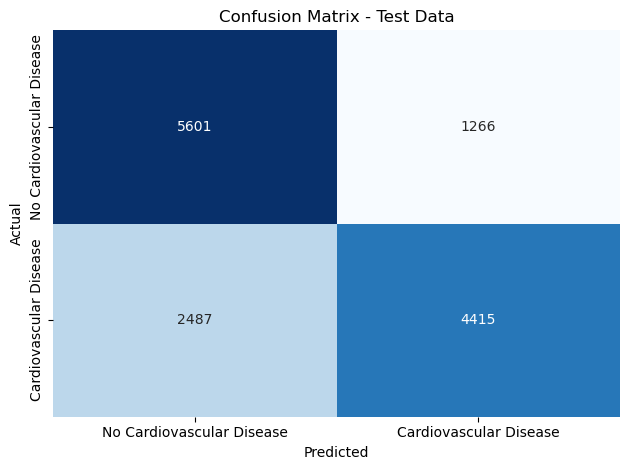


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6867
           1       0.78      0.64      0.70      6902

    accuracy                           0.73     13769
   macro avg       0.73      0.73      0.73     13769
weighted avg       0.73      0.73      0.73     13769



In [87]:
y_test_pred = adaboost_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.70 - Dari semua data training yang diprediksi sebagai kelas 0, 70% di antaranya memang benar kelas 0.
    - Recall: 0.81 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 81% dengan benar.
    - F1-score: 0.75 - Keseimbangan antara presisi dan recall cukup baik, yang berarti model cenderung mengenali kelas 0 dengan cukup baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.77 - Dari semua data training yang diprediksi sebagai kelas 1, 77% di antaranya memang benar kelas 1.
    - Recall: 0.64 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 64% dengan benar.
    - F1-score: 0.70 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 0.70, yang berarti model kesulitan dalam mengenali semua data kelas 1.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.73 - Secara keseluruhan, model berhasil memprediksi 71% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.69 - Dari semua data testing yang diprediksi sebagai kelas 0, 69% di antaranya memang benar kelas 0.
    - Recall: 0.82 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 82% dengan benar.
    - F1-score: 0.75 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing sudah cukup baik.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.78 - Dari semua data testing yang diprediksi sebagai kelas 1, 78% di antaranya memang benar kelas 1.
    - Recall: 0.64 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 64% dengan benar.
    - F1-score: 0.70 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 70%.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.73 - Secara keseluruhan, model berhasil memprediksi 73% data testing dengan benar.

**Kesimpulan Model AdaBoost:**

- Akurasi yang stabil (73%) menunjukkan bahwa model tidak mengalami overfitting atau underfitting.
- Perbedaan yang signifikan pada recall antara kedua kelas menunjukkan bahwa model lebih efektif dalam mengenali kelas 0 dibandingkan kelas 1.
- Model sering mengklasifikasikan kelas 1 sebagai kelas 0 (kesalahan klasifikasi).
- Model sudah cukup baik, tetapi perlu perbaikan untuk menangani bias terhadap kelas 0.

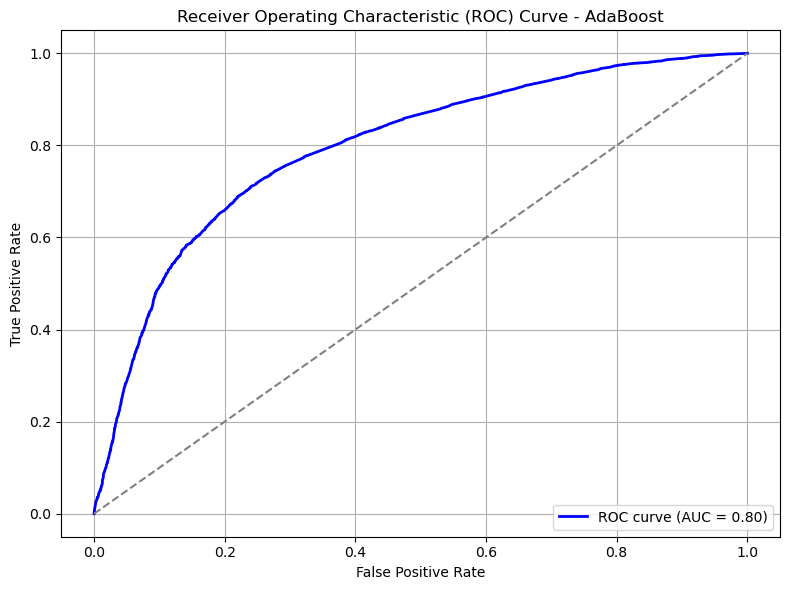

AUC: 0.80


In [88]:
y_prob = adaboost_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Nilai AUC yang mencapai 0.80 menunjukkan bahwa model ini memiliki kemampuan klasifikasi yang baik. Model AdaBoost ini dapat membedakan kelas positif dan negatif dengan akurasi 80%.

Kurva ROC yang berada cukup jauh di atas garis diagonal juga menunjukkan bawha model memiliki kemampuan prediksi yang lebih baik dari tebakan acak.

## Model 9: CatBoost

0:	learn: 0.6657596	total: 162ms	remaining: 2m 42s
200:	learn: 0.5319445	total: 1.69s	remaining: 6.73s
400:	learn: 0.5232423	total: 3.23s	remaining: 4.83s
600:	learn: 0.5160151	total: 4.78s	remaining: 3.17s
800:	learn: 0.5096292	total: 6.31s	remaining: 1.57s
999:	learn: 0.5039879	total: 7.78s	remaining: 0us


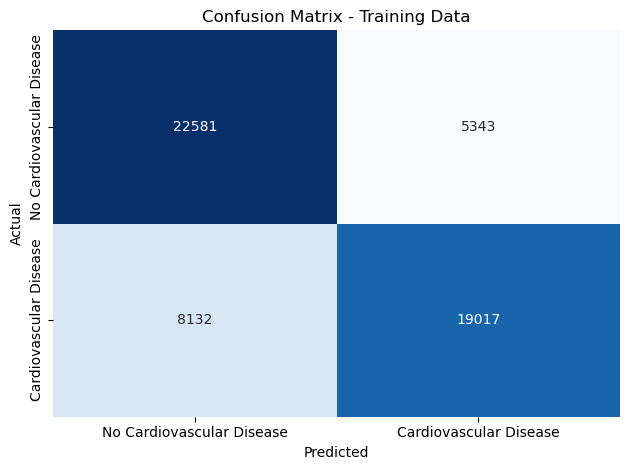


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     27924
           1       0.78      0.70      0.74     27149

    accuracy                           0.76     55073
   macro avg       0.76      0.75      0.75     55073
weighted avg       0.76      0.76      0.75     55073



In [90]:
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=200)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict the target values (cardio) for both the training and test sets
y_train_pred = catboost_model.predict(X_train)  # Predictions on training data

# Generate Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the Confusion Matrix for Training Data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))


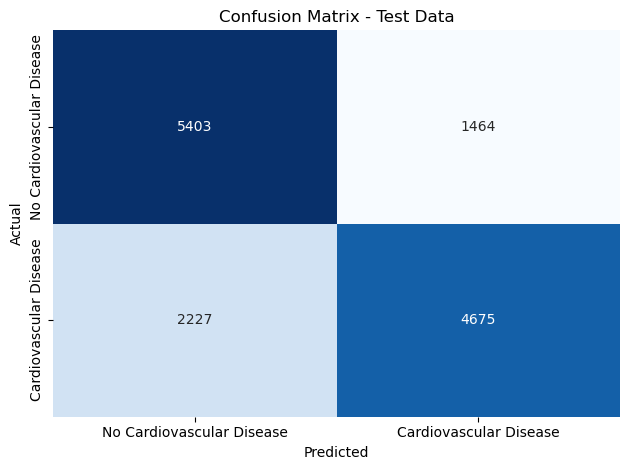


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6867
           1       0.76      0.68      0.72      6902

    accuracy                           0.73     13769
   macro avg       0.73      0.73      0.73     13769
weighted avg       0.73      0.73      0.73     13769



In [91]:
y_test_pred = catboost_model.predict(X_test)   # Predictions on test data

# Generate Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the Confusion Matrix for Test Data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'], 
            yticklabels=['No Cardiovascular Disease', 'Cardiovascular Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# Print the Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

**Interpretasi Hasil Training:**
Laporan klasifikasi pada data training menunjukkan performa model dalam mempelajari data yang diberikan.
1. Kelas 0:
    - Presisi: 0.74 - Dari semua data training yang diprediksi sebagai kelas 0, 74% di antaranya memang benar kelas 0.
    - Recall: 0.81 - Dari semua data training yang sebenarnya kelas 0, model berhasil mengidentifikasi 81% dengan benar.
    - F1-score: 0.77 - Keseimbangan antara presisi dan recall cukup baik, yang berarti model cenderung mengenali kelas 0 dengan cukup baik.
    - Support: 27924 - Jumlah data training yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.78 - Dari semua data training yang diprediksi sebagai kelas 1, 78% di antaranya memang benar kelas 1.
    - Recall: 0.70 - Dari semua data training yang sebenarnya kelas 1, model berhasil mengidentifikasi 70% dengan benar.
    - F1-score: 0.74 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 0.74, yang berarti model dapat mengenali semua data kelas 1 dengan cukup baik.
    - Support: 27149 - Jumlah data training yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.76 - Secara keseluruhan, model berhasil memprediksi 76% data training dengan benar.

**Interpretasi Hasil Testing:**
Data testing digunakan untuk menguji kemampuan generalisasi model pada data baru yang belum pernah dilihat sebelumnya.
1. Kelas 0:
    - Presisi: 0.71 - Dari semua data testing yang diprediksi sebagai kelas 0, 71% di antaranya memang benar kelas 0.
    - Recall: 0.79 - Dari semua data testing yang sebenarnya kelas 0, model berhasil mengidentifikasi 79% dengan benar.
    - F1-score: 0.75 - Keseimbangan antara presisi dan recall untuk kelas 0 pada data testing sudah cukup baik.
    - Support: 6867 - Jumlah data testing yang sebenarnya termasuk dalam kelas 0.
2. Kelas 1:
    - Presisi: 0.76 - Dari semua data testing yang diprediksi sebagai kelas 1, 76% di antaranya memang benar kelas 1.
    - Recall: 0.68 - Dari semua data testing yang sebenarnya kelas 1, model berhasil mengidentifikasi 68% dengan benar.
    - F1-score: 0.72 - Keseimbangan antara presisi dan recall untuk kelas 1 adalah 72%, yang berarti model tetap sulit mengenali data kelas 1.
    - Support: 6902 - Jumlah data testing yang sebenarnya termasuk dalam kelas 1.
3. Akurasi: 0.73 - Secara keseluruhan, model berhasil memprediksi 73% data testing dengan benar.

**Kesimpulan Model CatBoost:**

- Penurunan akurasi yang tidak terlalu signifikan menunjukkan bahwa model tidak terindikasi mengalami overfitting.
- Akurasi model CatBoost lebih tinggi daripada model sebelumnya, yang berarti model ini lebih akurat.
- Perbedaan yang signifikan pada recall antara kedua kelas menunjukkan bahwa model lebih efektif dalam mengenali kelas 0 dibandingkan kelas 1.
- Dibandingkan model sebelumnya, model ini dapat mengenali kelas 1 dengan lebih baik.

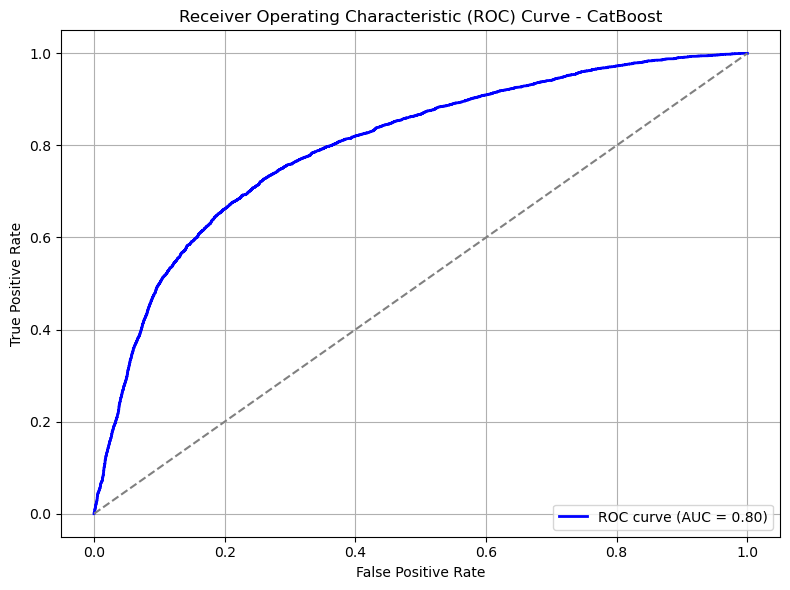

AUC: 0.80


In [92]:
y_prob = catboost_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Cardiovascular Disease)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the AUC value
print(f"AUC: {roc_auc:.2f}")

Nilai AUC yang mencapai 0.80 menunjukkan bahwa model ini memiliki kemampuan klasifikasi yang baik. Model CatBoost ini dapat membedakan kelas positif dan negatif dengan akurasi 80%.

Kurva ROC yang berada cukup jauh di atas garis diagonal juga menunjukkan bawha model memiliki kemampuan prediksi yang lebih baik dari tebakan acak.

### Summary All the Model

1. **Logistic Regression** -- Model ini digunakan untuk klasifikasi biner dengan memprediksi probablitas suatu kelas menggunakan fungsi sigmoid. 
2. **KNN** -- Model KNN merupakan model non-paramterik yang mengklasifikasikan data berdasarkan mayoritas kelas dari K tetangga terdekatnya dalam ruang fitur.
3. **SVM** -- Model ini bekerja dengan mencari hyperplane terbaik yang memisahkan kelas dengan margin maksimal, sehingga cocok untuk data non-linier.
4. **Decision Tree** -- Model ini bekerja dengan membangun struktur pohon dengan membagi data menjadi subset-subset berdasarkan nilai fitur tertentu. Namun, model ini rentan terhadap overfitting.
5. **Random Forest** -- Model Random Forest merupakan model ensemble dari beberapa Decision Tree yang dapat mengurangi risiko overfitting.
6. **XGBoost** -- XGBoost akan membangun model secara sequential, yang setiap model barunya akan mencoba mengoreksi kesalahan dari model sebelumnya menggunakan gradient descent.
7. **Naive Bayes** -- Model probabilistik ini bekerja dengan asumsi naif bahwa semua fitur independen satu sama lain.
8. **AdaBoost** -- Model boosting ini akan menggabungkan beberapa model lemah menjadi model yang kuat dengan menyesuaikan bobot kesalahan.
9. **CatBoost** -- Model implementasi Gradient Boosting ini dioptimalkan untuk data kategorikal, sehingga dapat mengurangi kebutuhan preprocessing (encoding_)

Berdasarkan tingkat akurasi pada data testing, berikut adalah peringkat model dari yang terbaik hingga terburuk : 
1. Logistic Regression (Akurasi = 73)
- **Tujuan**: Logistic Regression digunakan untuk klasifikasi biner, yaitu untuk memprediksi kemungkinan suatu data termasuk dalam kelas tertentu (0 atau 1). Model ini menggunakan fungsi logistik (sigmoid) untuk menghasilkan probabilitas yang kemudian dapat diubah menjadi prediksi biner.
- **Kelebihan**: Model ini sederhana dan cepat dilatih. Cocok untuk data yang dapat dipisahkan secara linier.
- **Kelemahan**: Kinerjanya kurang baik pada data dengan hubungan yang sangat non-linier.
2. XGBoost (Akurasi = 73)
- **Tujuan**: XGBoost adalah implementasi teroptimasi dari gradient boosting, di mana pohon dibangun secara berurutan dan setiap pohon baru mencoba memperbaiki kesalahan dari pohon sebelumnya dengan menggunakan gradient descent.
- **Kelebihan**: Kinerja sangat baik dalam hal akurasi, efisiensi, dan skalabilitas. Menangani data yang hilang dengan baik dan lebih tahan terhadap overfitting.
- **Kelemahan**: Membutuhkan pengaturan hyperparameter yang lebih hati-hati dibandingkan dengan model yang lebih sederhana.
3. AdaBoost (Akurasi = 73)
- **Tujuan**: AdaBoost (Adaptive Boosting) adalah metode ensemble yang menggabungkan beberapa pembelajaran lemah (biasanya decision tree) untuk membentuk pembelajaran yang lebih kuat. AdaBoost menyesuaikan bobot data yang salah diklasifikasikan oleh model sebelumnya.
- **Kelebihan**: Dapat meningkatkan akurasi dari model-model lemah dan tahan terhadap overfitting.
- **Kelemahan**: Sensitif terhadap data yang bising (noisy) dan outliers, serta membutuhkan pengaturan yang hati-hati.
4. CatBoost (Akurasi = 73)
- **Tujuan**: CatBoost adalah algoritma gradient boosting yang dirancang untuk menangani data kategorikal secara efisien. CatBoost mengurangi kebutuhan preprocessing data, seperti encoding.
- **Kelebihan**: Dioptimalkan untuk dataset dengan banyak fitur kategorikal dan seringkali lebih cepat serta lebih akurat dibandingkan dengan metode gradient boosting lainnya.
- **Kelemahan**: Seperti halnya model gradient boosting lainnya, CatBoost membutuhkan pengaturan hyperparameter yang hati-hati.
5. Support Vector Machine (SVM) (Akurasi = 72)
- **Tujuan**: SVM adalah model yang bekerja dengan mencari hyperplane yang memisahkan kelas dengan margin maksimal. SVM sangat efektif untuk data dengan dimensi tinggi dan dapat menangani hubungan non-linier menggunakan kernel.
- **Kelebihan**: Cocok untuk ruang dimensi tinggi, tahan terhadap overfitting pada dataset besar.
- **Kelemahan**: Dapat mahal dalam hal komputasi untuk dataset besar dan membutuhkan pengaturan hyperparameter yang cermat.
6. Naive Bayes (Akurasi = 70)
- **Tujuan**: Naive Bayes adalah model probabilistik yang didasarkan pada Teorema Bayes. Model ini mengasumsikan bahwa semua fitur independen satu sama lain, yang disebut asumsi "naif".
- **Kelebihan**: Sangat cepat dan bekerja baik pada data teks atau data di mana independensi fitur adalah asumsi yang masuk akal.
- **Kelemahan**: Asumsi independensi fitur sering kali tidak realistis, yang dapat mempengaruhi kinerja pada beberapa dataset.
7. K-Nearest Neighbors (KNN) (Akurasi = 69)
- **Tujuan**: KNN adalah model non-parametrik yang digunakan untuk klasifikasi dan regresi. Model ini mengklasifikasikan data berdasarkan mayoritas kelas dari 'K' tetangga terdekatnya dalam ruang fitur.
- **Kelebihan**: Mudah dipahami dan diterapkan, efektif pada dataset kecil.
- **Kelemahan**: Menjadi sangat mahal secara komputasi untuk dataset besar karena harus menghitung jarak untuk setiap titik data.
8. Random Forest (Akurasi = 68)
- **Tujuan**: Random Forest adalah metode ensemble yang membangun beberapa decision tree dan menggabungkan prediksinya. Dengan cara ini, Random Forest mengurangi risiko overfitting yang ada pada decision tree tunggal.
- **Kelebihan**: Lebih akurat dan lebih tahan terhadap overfitting dibandingkan dengan decision tree tunggal.
- **Kelemahan**: Lebih mahal dalam hal komputasi dan lebih sulit untuk diinterpretasikan karena banyaknya pohon yang digunakan.
9. Decision Tree (Akurasi = 64)
- **Tujuan**: Decision Tree membangun struktur pohon untuk mengambil keputusan berdasarkan nilai fitur tertentu. Setiap node internal mewakili keputusan berdasarkan fitur, dan daun-daun pohon mewakili hasilnya.
- **Kelebihan**: Mudah dipahami dan divisualisasikan, dapat menangani data numerik dan kategorikal.
- **Kelemahan**: Rentan terhadap overfitting, terutama jika pohon terlalu dalam dan datasetnya kecil.




Berdasarkan peringkat tersebut, Logistic Regression, XGBoost, AdaBoost, dan CatBoost memiliki tingkat akurasi tertinggi. Hal ini berarti model tersebut dapat memprediksi secara optimal.

## ROC AUC Curve for All the Model

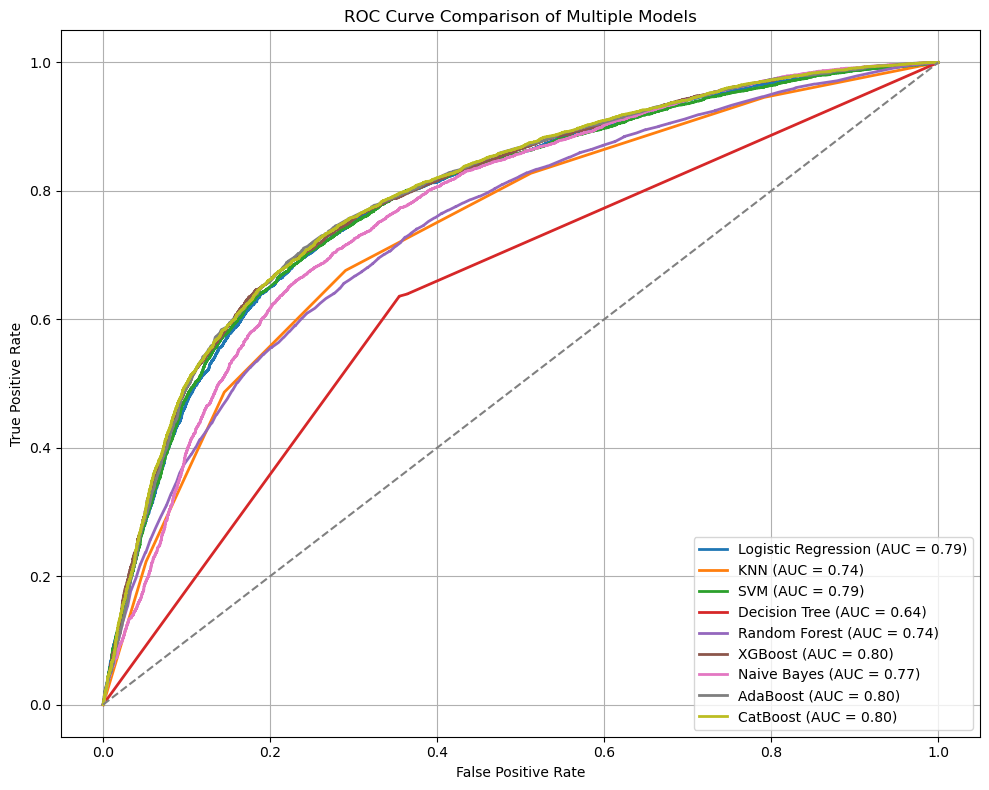

In [93]:
# List of your trained models
models = [lr_model, knn_model, svm_model, dt_model, rf_model, xgb_model, nb_model, adaboost_model, catboost_model]
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Naive Bayes', 'AdaBoost', 'CatBoost']

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    # Get predicted probabilities for class 1 (Cardiovascular Disease)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the model
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier (diagonal line)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik ROC tersebut menunjukkan perbandingan semua model klasifikasi yanng digunakan berdasarkan kemampuannya dalam membedakan kelas positif dan negatif.

1. XGBoost (AUC = 0.80)
2. AdaBoost (AUC = 0.80)
3. CatBoost (AUC = 0.80)
4. Logistic Regression (AUC = 0.79)
5. SVM (AUC = 0.79)
6. Naive Bayes (AUC = 0.77)
7. KNN (AUC = 0.74)
8. Random Forest (AUC = 0.74)
9. Decision Tree (AUC = 0.64)

Berdasarkan nilai AUC pada semua model, **XGBoost, AdaBoost, dan CatBoost memberikan hasil terbaik** dengan nilai AUC yang mencapai 0.80. Maka, ketiga model tersebut dapat digunakan untuk memperoleh hasil terbaik. Model Logistic Regression dan SVM memiliki nilai AUC yang tidak berbeda jauh dengan ketiga model tersebut, yaitu sebesar 0.79, maka kedua model tersebut dapat dijadikan sebagai alternatif jika ingin model yang lebih sederhana. 
Model Naive Bayes, KNN, dan Random Forest memiliki performa yang kurang optimal, maka diperlukan peningkatan performa untuk memberikan hasil yang lebih baik. Nilai AUC yang rendah pada model Decision Tree menunjukkan bahwa model ini merupakan model yang paling buruk dalam membedakan kelas positif dan negatif, maka model ini harus dihindari.

**Hasil Evaluasi Model**
Berdasarkan evaluasi menyeluruh terhadap beberapa model machine learning, kami menemukan bahwa XGBoost dan CatBoost menunjukkan performa terbaik dalam tugas klasifikasi ini. Keduanya mencapai skor yang sangat baik, dengan sedikit perbedaan yang tidak signifikan secara statistik.

Namun,  meskipun tidak ada perbedaan yang sangat signifikan di antara keduanya, kami memilih model **XGBoost** untuk deployment. 

**Mengapa Kami Memilih XGBoost?**
1. XGBoost menunjukkan **stabilitas** yang sangat baik di seluruh data training dan testing kami. Performa model tidak banyak berbeda antara kedua set data, yang mengindikasikan bahwa model ini tidak overfit dan mampu menggeneralisasi dengan baik pada data baru.
2. XGBoost mencapai **keseimbangan yang baik antara presisi dan recall** untuk kedua kelas. Ini berarti model ini tidak hanya akurat dalam memprediksi kelas mayoritas, tetapi juga kelas minoritas. Keseimbangan ini sangat penting untuk memastikan bahwa model kami dapat diandalkan dalam berbagai situasi.
3. Dalam konteks proyek ini, kecepatan training adalah faktor penting. XGBoost umumnya **lebih cepat dalam training** dibandingkan CatBoost, terutama untuk dataset berukuran besar. Ini memungkinkan kami untuk melakukan iterasi dan eksperimen lebih cepat dalam proses pengembangan model.
4. XGBoost relatif **lebih mudah untuk diinterpretasikan** dibandingkan CatBoost. Ini memudahkan kami untuk memahami bagaimana model membuat prediksi dan mengidentifikasi fitur-fitur penting yang memengaruhi hasil. Interpretasi model yang baik sangat penting untuk membangun kepercayaan dan memastikan bahwa model kami bekerja seperti yang diharapkan.

Setelah melalui proses evaluasi yang cermat, kami memutuskan untuk mengimplementasikan model XGBoost ini dalam sistem yang akan kami deploy. Model ini akan menjadi inti dari aplikasi yang akan membantu memprediksi risiko kardiovaskular seseorang berdasarkan faktor-faktor tertentu.

**Input Model:**

Model XGBoost yang telah kami latih akan menerima input berupa:
1. Usia (age): Usia pasien dalam tahun.
2. Berat Badan (weight): Berat badan pasien dalam kilogram.
3. Tekanan Darah Sistolik (ap_hi): Tekanan darah sistolik pasien dalam mmHg.
4. Tekanan Darah Diastolik (ap_lo): Tekanan darah diastolik pasien dalam mmHg.
5. Kolesterol (cholesterol): Kadar kolesterol pasien.
6. Glukosa (gluc): Kadar glukosa pasien.

**Output Model:**

Berdasarkan input tersebut, model XGBoost akan menghasilkan output berupa:

1: Menunjukkan bahwa individu tersebut memiliki kemungkinan besar mengalami masalah kardiovaskular.

0: Menunjukkan bahwa individu tersebut memiliki kemungkinan kecil mengalami masalah kardiovaskular.

In [95]:
import joblib

joblib.dump(xgb_model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']